###v test

## PHASE 2 — EXPLORATORY DATA ANALYSIS (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Fix: Use a valid matplotlib style instead of "seaborn"
# Common valid styles include 'seaborn-v0_8', 'ggplot', 'fivethirtyeight', etc.
# Or you can check available styles with plt.style.available
plt.style.use("seaborn-v0_8")  # Updated to use a valid style name

# Alternative approach: Instead of using plt.style.use, you could also
# set the seaborn style directly with:
# sns.set_style("darkgrid")  # or "whitegrid", "dark", "white", "ticks"

df = pd.read_csv("data/processed/modelling_dataset.csv", parse_dates=["timestamp"])

df.head(), df.shape

(            timestamp        RRP  TOTALDEMAND  DEMAND_AND_NONSCHEDGEN  \
 0 2025-01-01 00:05:00  138.02790      7251.07              7376.44276   
 1 2025-01-01 00:10:00  134.41651      7297.85              7423.26277   
 2 2025-01-01 00:15:00  135.89000      7274.39              7392.27277   
 3 2025-01-01 00:20:00  120.30552      7173.05              7285.67277   
 4 2025-01-01 00:25:00  119.88874      7140.49              7251.77685   
 
    AVAILABLEGENERATION  NETINTERCHANGE  TOTALINTERMITTENTGENERATION  \
 0          12034.75116          355.87                     92.33276   
 1          12019.46909          307.06                     91.19277   
 2          12012.23745          323.45                     91.32277   
 3          12011.59961          423.75                     91.03277   
 4          12017.73580          462.43                     89.80685   
 
    pv_rooftop_mw  temperature  wind_speed  irradiance  hour  dayofweek  month  \
 0            NaN         27.3        

In [2]:
df.isna().sum()


timestamp                          0
RRP                                0
TOTALDEMAND                        0
DEMAND_AND_NONSCHEDGEN             0
AVAILABLEGENERATION                0
NETINTERCHANGE                     0
TOTALINTERMITTENTGENERATION        0
pv_rooftop_mw                      5
temperature                        0
wind_speed                         0
irradiance                     87552
hour                               0
dayofweek                          0
month                              0
net_demand_after_pv                5
dtype: int64

In [3]:
df.describe()


timestamp           RRP   TOTALDEMAND  \
count                          87552  87552.000000  87552.000000   
mean   2025-06-02 00:02:30.000000256    109.184412   7624.261409   
min              2025-01-01 00:05:00   -999.994060   2532.250000   
25%              2025-03-18 00:03:45     51.700380   6616.137500   
50%              2025-06-02 00:02:30     81.939570   7493.870000   
75%              2025-08-17 00:01:15    121.838998   8488.095000   
max              2025-11-01 00:00:00  20300.000000  13159.460000   
std                              NaN    484.231893   1551.164262   

       DEMAND_AND_NONSCHEDGEN  AVAILABLEGENERATION  NETINTERCHANGE  \
count            87552.000000         87552.000000    87552.000000   
mean              7906.744659         12503.848843     -501.319423   
min               3545.201530          8203.899750    -2374.510000   
25%               6906.482987         11477.918810     -894.562500   
50%               7753.740765         12368.635410     -528.625000   
75%               8696.639052         13535.714812     -127.255000   
max              13329.272510         17463.061940     2376.340000   
std               1446.673941          1487.189345      573.193494   

       TOTALINTERMITTENTGENERATION  pv_rooftop_mw   temperature    wind_speed  \
count                 87552.000000   87547.000000  87552.000000  87552.000000   
mean                    109.158174    2043.197444     18.559648     20.255916   
min                      -1.857990       0.000000      6.000000      0.000000   
25%                      66.456762       0.000000     14.900000     13.000000   
50%                      96.741270      14.625000     18.800000     18.400000   
75%                     146.930868    3874.921000     22.100000     26.000000   
max                     275.132340   11340.498000     40.700000     72.400000   
std                      53.951364    2891.618163      5.168678     10.522491   

       irradiance          hour     dayofweek        month  \
count         0.0  87552.000000  87552.000000  87552.00000   
mean          NaN     11.500000      3.000034      5.52643   
min           NaN      0.000000      0.000000      1.00000   
25%           NaN      5.750000      1.000000      3.00000   
50%           NaN     11.500000      3.000000      6.00000   
75%           NaN     17.250000      5.000000      8.00000   
max           NaN     23.000000      6.000000     11.00000   
std           NaN      6.922226      1.991779      2.87105   

       net_demand_after_pv  
count         87547.000000  
mean           5581.086632  
min           -8339.663000  
25%            3621.004500  
50%            6850.824000  
75%            8044.532000  
max           13158.652000  
std            3905.703982

In [4]:
df = df.drop(columns=["irradiance"])


In [5]:
df.isna().sum()

timestamp                      0
RRP                            0
TOTALDEMAND                    0
DEMAND_AND_NONSCHEDGEN         0
AVAILABLEGENERATION            0
NETINTERCHANGE                 0
TOTALINTERMITTENTGENERATION    0
pv_rooftop_mw                  5
temperature                    0
wind_speed                     0
hour                           0
dayofweek                      0
month                          0
net_demand_after_pv            5
dtype: int64

In [6]:
null_percentages=(df.isnull().sum() / len(df) * 100).round(2)

null_percentages

timestamp                      0.00
RRP                            0.00
TOTALDEMAND                    0.00
DEMAND_AND_NONSCHEDGEN         0.00
AVAILABLEGENERATION            0.00
NETINTERCHANGE                 0.00
TOTALINTERMITTENTGENERATION    0.00
pv_rooftop_mw                  0.01
temperature                    0.00
wind_speed                     0.00
hour                           0.00
dayofweek                      0.00
month                          0.00
net_demand_after_pv            0.01
dtype: float64

In [7]:
df[df.isnull().any(axis=1)]


timestamp        RRP  TOTALDEMAND  DEMAND_AND_NONSCHEDGEN  \
0 2025-01-01 00:05:00  138.02790      7251.07              7376.44276   
1 2025-01-01 00:10:00  134.41651      7297.85              7423.26277   
2 2025-01-01 00:15:00  135.89000      7274.39              7392.27277   
3 2025-01-01 00:20:00  120.30552      7173.05              7285.67277   
4 2025-01-01 00:25:00  119.88874      7140.49              7251.77685   

   AVAILABLEGENERATION  NETINTERCHANGE  TOTALINTERMITTENTGENERATION  \
0          12034.75116          355.87                     92.33276   
1          12019.46909          307.06                     91.19277   
2          12012.23745          323.45                     91.32277   
3          12011.59961          423.75                     91.03277   
4          12017.73580          462.43                     89.80685   

   pv_rooftop_mw  temperature  wind_speed  hour  dayofweek  month  \
0            NaN         27.3        13.0     0          2      1   
1            NaN         27.3        13.0     0          2      1   
2            NaN         27.3        13.0     0          2      1   
3            NaN         27.3        13.0     0          2      1   
4            NaN         27.3        13.0     0          2      1   

   net_demand_after_pv  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN

## we can drop the values of the pv_roodtop_pv bcs the it is the night time and the solar irrdance or solar exposure is zero 

In [8]:
df['pv_rooftop_mw'] = df['pv_rooftop_mw'].fillna(0)
df['net_demand_after_pv'] = df['TOTALDEMAND'] - df['pv_rooftop_mw']


In [9]:

## Quick check after checkign the outliers 
null_percentages=(df.isnull().sum() / len(df) * 100).round(2)

null_percentages

timestamp                      0.0
RRP                            0.0
TOTALDEMAND                    0.0
DEMAND_AND_NONSCHEDGEN         0.0
AVAILABLEGENERATION            0.0
NETINTERCHANGE                 0.0
TOTALINTERMITTENTGENERATION    0.0
pv_rooftop_mw                  0.0
temperature                    0.0
wind_speed                     0.0
hour                           0.0
dayofweek                      0.0
month                          0.0
net_demand_after_pv            0.0
dtype: float64

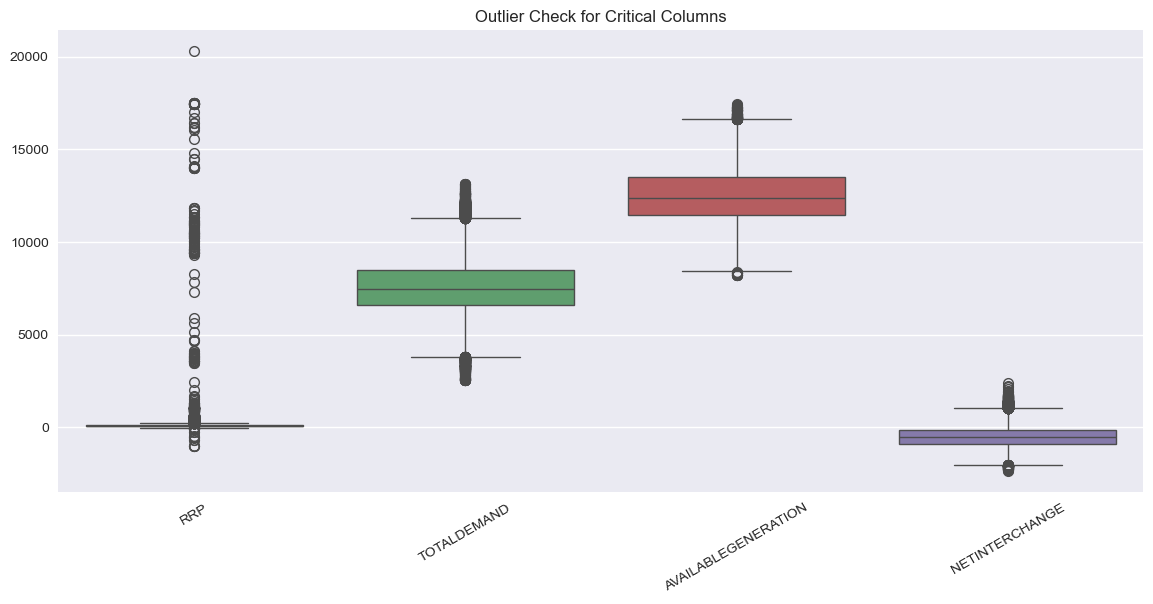

In [10]:
critical_cols = ["RRP", "TOTALDEMAND", "AVAILABLEGENERATION", "NETINTERCHANGE"]

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
sns.boxplot(data=df[critical_cols])
plt.xticks(rotation=30)
plt.title("Outlier Check for Critical Columns")
plt.show()


## Negative RRP values are real NEM behaviour caused by renewable oversupply and generator inflexibility. Instead of removing them, we treat them as a feature because they provide essential information for forecasting price volatility and renewable impact.”

## Detail EDA 

## Summary Statistics (what ranges, variability, spikes)

In [11]:
df.describe()

timestamp           RRP   TOTALDEMAND  \
count                          87552  87552.000000  87552.000000   
mean   2025-06-02 00:02:30.000000256    109.184412   7624.261409   
min              2025-01-01 00:05:00   -999.994060   2532.250000   
25%              2025-03-18 00:03:45     51.700380   6616.137500   
50%              2025-06-02 00:02:30     81.939570   7493.870000   
75%              2025-08-17 00:01:15    121.838998   8488.095000   
max              2025-11-01 00:00:00  20300.000000  13159.460000   
std                              NaN    484.231893   1551.164262   

       DEMAND_AND_NONSCHEDGEN  AVAILABLEGENERATION  NETINTERCHANGE  \
count            87552.000000         87552.000000    87552.000000   
mean              7906.744659         12503.848843     -501.319423   
min               3545.201530          8203.899750    -2374.510000   
25%               6906.482987         11477.918810     -894.562500   
50%               7753.740765         12368.635410     -528.625000   
75%               8696.639052         13535.714812     -127.255000   
max              13329.272510         17463.061940     2376.340000   
std               1446.673941          1487.189345      573.193494   

       TOTALINTERMITTENTGENERATION  pv_rooftop_mw   temperature    wind_speed  \
count                 87552.000000   87552.000000  87552.000000  87552.000000   
mean                    109.158174    2043.080760     18.559648     20.255916   
min                      -1.857990       0.000000      6.000000      0.000000   
25%                      66.456762       0.000000     14.900000     13.000000   
50%                      96.741270      14.605000     18.800000     18.400000   
75%                     146.930868    3874.251250     22.100000     26.000000   
max                     275.132340   11340.498000     40.700000     72.400000   
std                      53.951364    2891.576815      5.168678     10.522491   

               hour     dayofweek        month  net_demand_after_pv  
count  87552.000000  87552.000000  87552.00000         87552.000000  
mean      11.500000      3.000034      5.52643          5581.180649  
min        0.000000      0.000000      1.00000         -8339.663000  
25%        5.750000      1.000000      3.00000          3621.351000  
50%       11.500000      3.000000      6.00000          6850.910000  
75%       17.250000      5.000000      8.00000          8044.467500  
max       23.000000      6.000000     11.00000         13158.652000  
std        6.922226      1.991779      2.87105          3905.612294

# 📊 Summary Statistics Interpretation (Energy Spot Price Dataset – 2025)

This section interprets the descriptive statistics for the key variables in the 5-minute NEM market dataset (Jan–Nov 2025). These insights help identify patterns, anomalies, and relationships relevant for forecasting.

---

## 🔹 1. Spot Price (RRP)

**Key Metrics**
- **Mean:**  109.18 $/MWh  
- **Median:**  81.94 $/MWh  
- **Min:**  −999.99 $/MWh  
- **Max:**  20,300 $/MWh  
- **Std Dev:**  484.23  

**Interpretation**
- RRP is **highly volatile**, driven by market dynamics, outage events, and renewable generation swings.
- The mean > median → **right-skewed distribution** due to extreme price spikes.
- Deep negative prices indicate:
  - Excess solar generation  
  - Congestion or low operational demand  
  - Generators bidding negative to avoid shutdown costs  
- Extreme spikes (> $10k/MWh) reflect scarcity events such as heatwaves or unit trips.

---

## 🔹 2. Total Demand

**Key Metrics**
- **Mean:** 7,624 MW  
- **Range:** 2,532 – 13,159 MW  
- **Std Dev:** 1,551  

**Interpretation**
- NSW exhibits strong **daily and seasonal demand cycles**.
- Variability is consistent with weather-driven residential and industrial loads.
- Distribution is relatively symmetric (mean ~ median).

---

## 🔹 3. Demand + Nonscheduled Generation

**Interpretation**
- Slightly higher than TOTALDEMAND, capturing small-scale and non-scheduled resources.
- Useful to understand **effective demand before utility-scale contribution**.

---

## 🔹 4. Available Generation

**Key Metrics**
- **Mean:** 12,503 MW  
- **Range:** 8,203 – 17,463 MW  

**Interpretation**
- NSW generally has **ample available supply relative to demand**.
- High availability during solar periods may contribute to **midday price drops**.

---

## 🔹 5. Net Interchange (Imports/Exports)

**Key Metrics**
- **Mean:** −501 MW (net importer)  
- **Range:** −2,374 to +2,376 MW  

**Interpretation**
- NSW frequently imports from VIC/QLD.
- High imports during peak times influence **price stability and volatility**.

---

## 🔹 6. Intermittent Generation (Utility Solar + Wind)

**Key Metric**
- **Mean:** 109 MW  

**Interpretation**
- Utility-scale contribution is relatively low compared to rooftop PV.
- Still plays a role in price suppression during high-output periods.

---

## 🔹 7. Rooftop PV Output (pv_rooftop_mw)

**Key Metrics**
- **Mean:** 2,043 MW  
- **Max:** 11,340 MW  
- **Min:** 0 MW (night)  

**Interpretation**
- Rooftop PV significantly **reduces daytime operational demand**.
- Strongly linked to **negative prices** and midday price dips.

---

## 🔹 8. Temperature

**Key Metrics**
- **Mean:** 18.56°C  
- **Range:** 6°C – 40.7°C  

**Interpretation**
- Temperature strongly influences demand peaks (heating/cooling).
- Expected correlation with price spikes during extreme heat.

---

## 🔹 9. Wind Speed

**Key Metrics**
- **Mean:** 20.25 km/h  
- **Max:** 72.4 km/h  

**Interpretation**
- Wind speed boosts wind generation → contributes to **lower prices** during windy periods.

---

## 🔹 10. Time Features (hour, dayofweek, month)

**Interpretation**
- **Hour:** captures solar effects, morning/evening peaks.  
- **Dayofweek:** weekdays > weekends due to industrial load.  
- **Month:** seasonal patterns (winter heating, summer cooling).

---

## 🔹 11. Net Demand After PV

**Key Metrics**
- **Mean:** 5,581 MW  
- **Range:** −8,339 to 13,158 MW  

**Interpretation**
- Negative values = **PV exceeds underlying demand** → strong indicator of negative price events.
- One of the most important features for price forecasting.

---

## ✅ Key Insights Summary

- **RRP** shows extreme volatility driven by demand, renewable supply, and market constraints.
- **Rooftop solar** is the biggest factor influencing negative prices and midday demand drops.
- **Temperature and demand** follow predictable seasonal patterns.
- **Interconnector flows** play a major role in NSW price stability.
- **Net demand after PV** may be your **strongest single predictor** of spot price behaviour.

---



## 2. Time-Series Behaviour (trend & seasonality)

<Axes: xlabel='timestamp'>

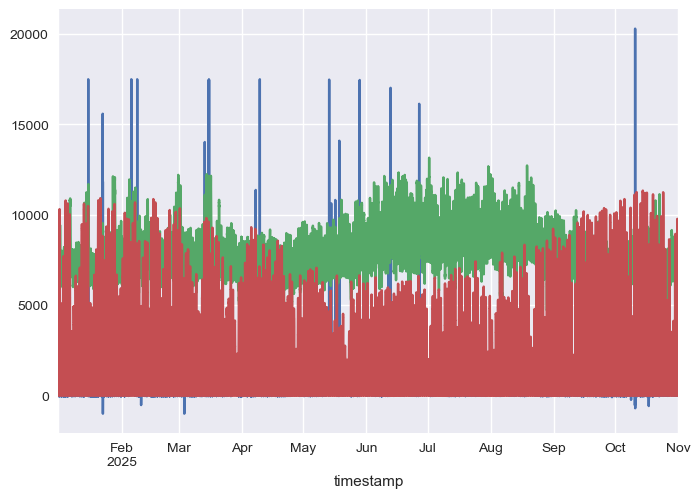

In [12]:
df.set_index("timestamp")["RRP"].plot()
df.set_index("timestamp")["TOTALDEMAND"].plot()
df.set_index("timestamp")["pv_rooftop_mw"].plot()


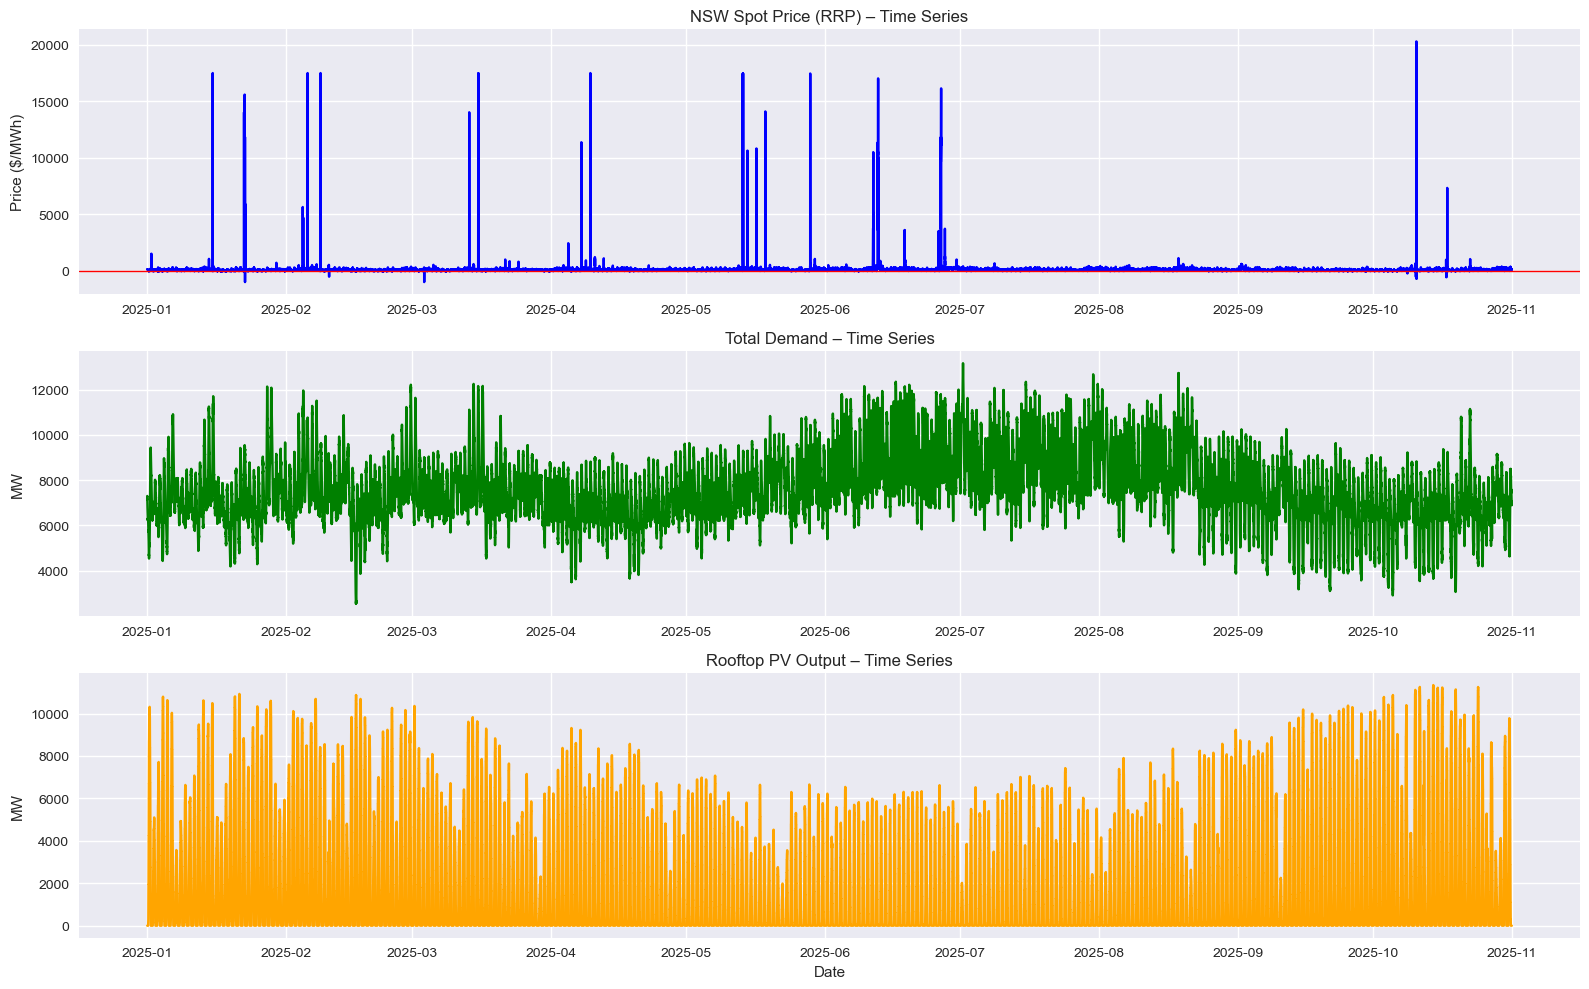

In [13]:
plt.figure(figsize=(16,10))

plt.subplot(3,1,1)
plt.plot(df['timestamp'], df['RRP'], color='blue')
plt.title("NSW Spot Price (RRP) – Time Series")
plt.ylabel("Price ($/MWh)")
plt.axhline(0, color='red', linewidth=1)

plt.subplot(3,1,2)
plt.plot(df['timestamp'], df['TOTALDEMAND'], color='green')
plt.title("Total Demand – Time Series")
plt.ylabel("MW")

plt.subplot(3,1,3)
plt.plot(df['timestamp'], df['pv_rooftop_mw'], color='orange')
plt.title("Rooftop PV Output – Time Series")
plt.ylabel("MW")
plt.xlabel("Date")

plt.tight_layout()
plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# make sure timestamp is datetime and sorted
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

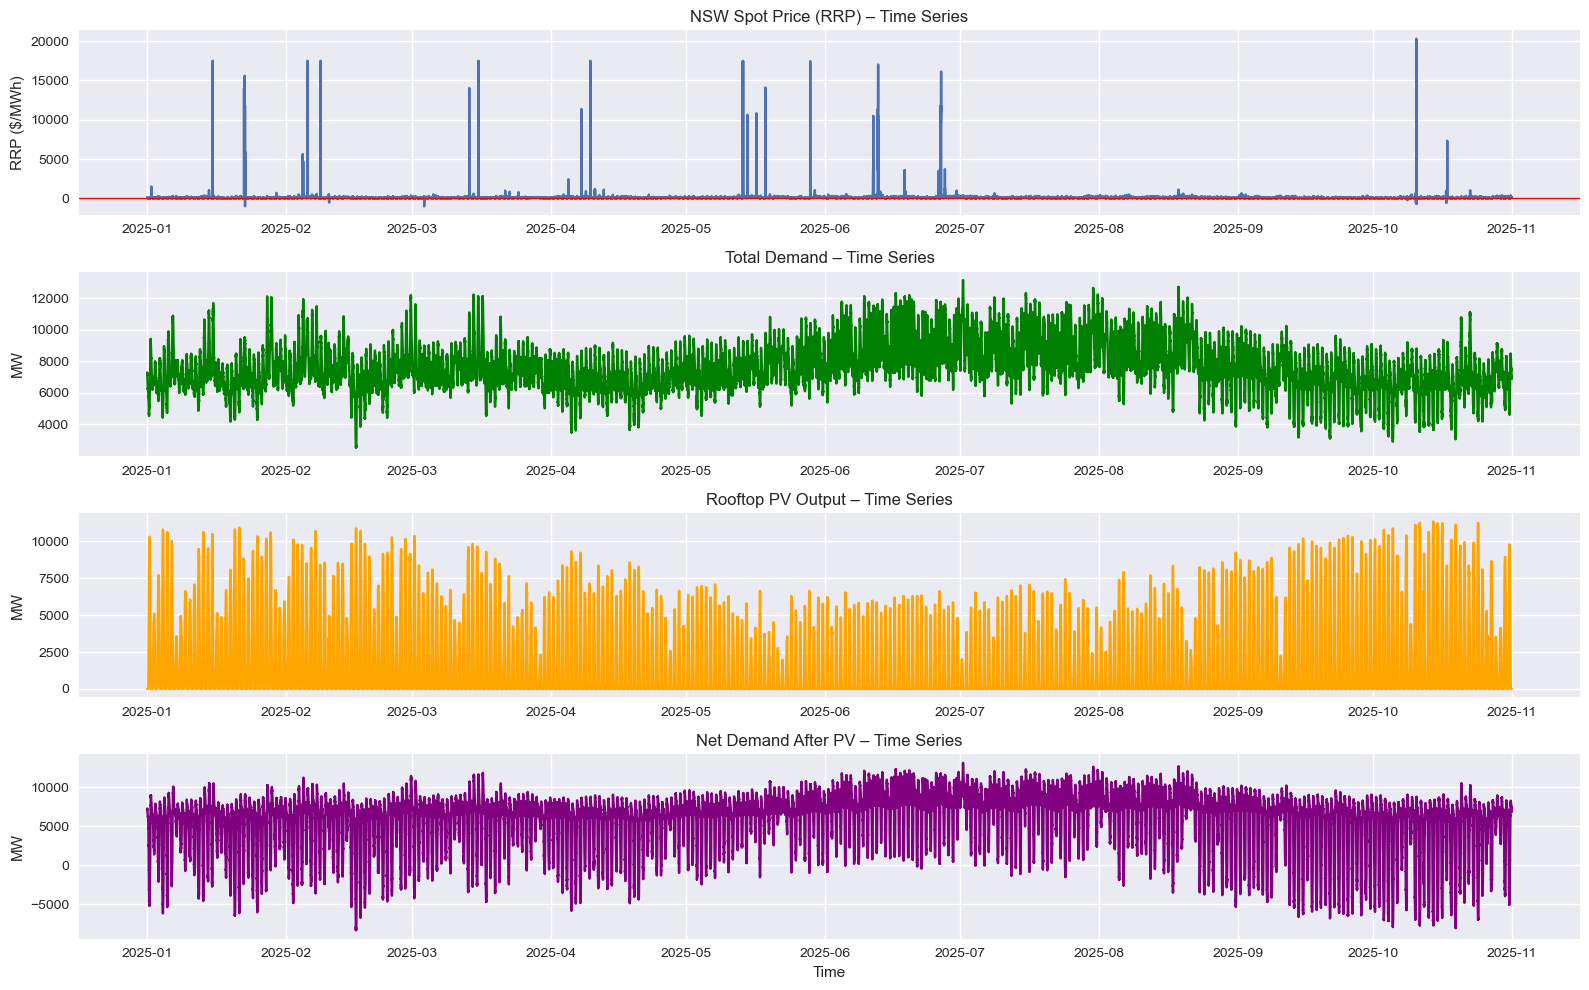

In [15]:
plt.figure(figsize=(16,10))

# 1) RRP
plt.subplot(4,1,1)
plt.plot(df["timestamp"], df["RRP"])
plt.axhline(0, color="red", linewidth=1)
plt.title("NSW Spot Price (RRP) – Time Series")
plt.ylabel("RRP ($/MWh)")

# 2) Total Demand
plt.subplot(4,1,2)
plt.plot(df["timestamp"], df["TOTALDEMAND"], color="green")
plt.title("Total Demand – Time Series")
plt.ylabel("MW")

# 3) Rooftop PV
plt.subplot(4,1,3)
plt.plot(df["timestamp"], df["pv_rooftop_mw"], color="orange")
plt.title("Rooftop PV Output – Time Series")
plt.ylabel("MW")

# 4) Net Demand After PV
plt.subplot(4,1,4)
plt.plot(df["timestamp"], df["net_demand_after_pv"], color="purple")
plt.title("Net Demand After PV – Time Series")
plt.ylabel("MW")
plt.xlabel("Time")

plt.tight_layout()
plt.show()


## 2.Average daily pattern (hour-of-day) for RRP & Demand

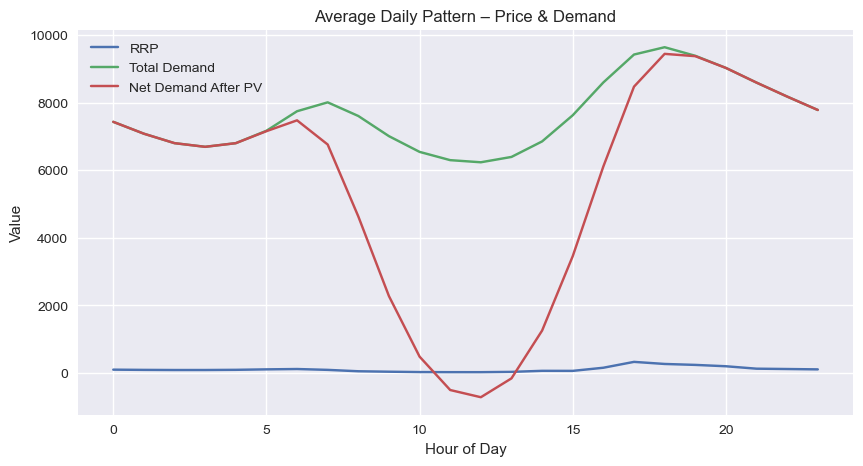

In [16]:
# ensure hour is present
df["hour"] = df["timestamp"].dt.hour

hourly_profile = (
    df.groupby("hour")[["RRP", "TOTALDEMAND", "net_demand_after_pv"]]
      .mean()
      .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(hourly_profile["hour"], hourly_profile["RRP"], label="RRP")
plt.plot(hourly_profile["hour"], hourly_profile["TOTALDEMAND"], label="Total Demand")
plt.plot(hourly_profile["hour"], hourly_profile["net_demand_after_pv"], label="Net Demand After PV")
plt.title("Average Daily Pattern – Price & Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


## 3.mMonthly semasonality of RRP (boxplot)

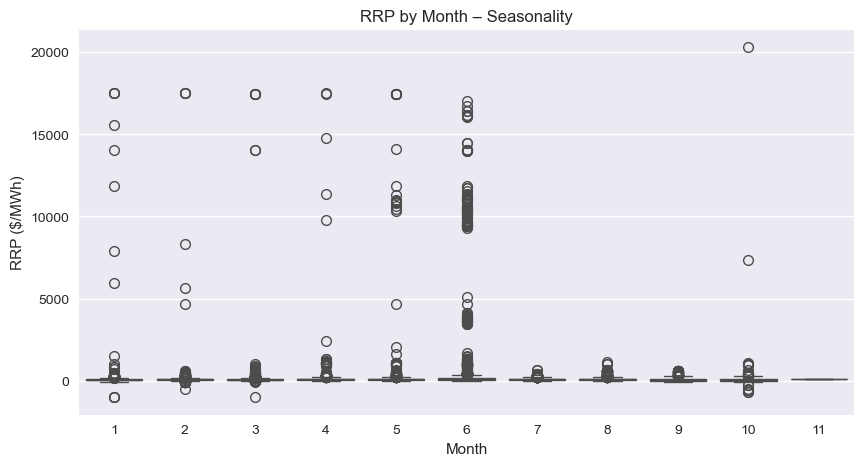

In [17]:
df["month"] = df["timestamp"].dt.month

plt.figure(figsize=(10,5))
sns.boxplot(x="month", y="RRP", data=df)
plt.title("RRP by Month – Seasonality")
plt.xlabel("Month")
plt.ylabel("RRP ($/MWh)")
plt.show()


## Corelation 

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation
numeric_cols = [
    "RRP",
    "TOTALDEMAND",
    "AVAILABLEGENERATION",
    "NETINTERCHANGE",
    "TOTALINTERMITTENTGENERATION",
    "pv_rooftop_mw",
    "temperature",
    "wind_speed",
    "net_demand_after_pv"
]

corr = df[numeric_cols].corr()

plt.figure(figsize=(14,10))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.title("Correlation Heatmap of Key Variables", fontsize=16)
plt.show()


# 🔍 Correlation Interpretation Summary Table

Below is a structured summary of the correlation heatmap insights for all major variables used in the NSW spot price forecasting dataset.

| Variable Relationship | Correlation | Interpretation | Impact on Price | Recommendation |
|----------------------|-------------|----------------|------------------|----------------|
| **RRP ↔ TOTALDEMAND** | 0.18 | Weak correlation because raw demand doesn't capture solar effect or net load | Low | Use **net_demand_after_pv** instead of TOTALDEMAND for modelling |
| **RRP ↔ net_demand_after_pv** | 0.15 | Still weak because price is non-linear & spike-driven | Medium | Add **lags + rolling windows** to improve predictive power |
| **RRP ↔ pv_rooftop_mw** | –0.11 | More solar → lower prices; but effect indirect | Medium | Keep as key feature; solar drives negative prices |
| **RRP ↔ AVAILABLEGENERATION** | –0.08 | Available capacity doesn't directly predict price | Low | Keep but treat as secondary feature |
| **RRP ↔ temperature** | –0.08 | Weather influences demand but weakly tied to RRP | Low | Keep for seasonal effects only |
| **RRP ↔ wind_speed** | –0.04 | NSW wind contribution is small → low correlation | Low | Optional feature |
| **TOTALDEMAND ↔ pv_rooftop_mw** | –0.50 | Solar reduces grid demand (duck curve effect) | High (indirect) | Essential in net demand calculations |
| **TOTALDEMAND ↔ net_demand_after_pv** | 0.77 | Strong relationship; net demand is demand adjusted for solar | High | Use **net demand** as primary explanatory variable |
| **AVAILABLEGENERATION ↔ pv_rooftop_mw** | 0.60 | Solar availability raises total available supply | Medium | Useful in modelling supply-demand balance |
| **TOTALINTERMITTENTGENERATION ↔ AVAILABLEGENERATION** | 0.41 | Wind+solar increase total generation availability | Medium | Keep for context but not primary |
| **NETINTERCHANGE ↔ AVAILABLEGENERATION** | 0.35 | When more generation is available, imports reduce | Medium | Keep; interconnectors influence scarcity pricing |
| **pv_rooftop_mw ↔ net_demand_after_pv** | –0.94 | Strong inverse: solar directly reduces net demand | Very High | This is the **most important feature combination** |
| **hour ↔ RRP** | (not shown in matrix but expected moderate) | Captures solar midday dip & evening peak | High | Use hour as categorical/time-based feature |
| **dayofweek ↔ RRP** | (weak) | Industrial vs residential load differences | Low-Medium | Keep for pattern modelling |
| **month ↔ RRP** | (seasonal) | Seasonal demand cycle (winter peaks) | Medium | Essential for seasonality modelling |

---

# 📌 Key Takeaways

- **Net demand after PV** is a far better predictor of RRP than raw demand.  
- **Solar output** is one of the strongest drivers of negative prices.  
- RRP behaves **non-linearly**, so correlations underestimate real relationships.  
- Time-based features (hour/day/month) are crucial for capturing solar & demand cycles.  
- Use XGBoost/LSTM to capture the non-linear nature of price formation.

---

# 🚀 Recommendation for Modelling

| Step | What to Add | Why |
|------|-------------|------|
| **1. Lag features** | RRP(t-1), demand(t-1), PV(t-1) | Prices react to previous interval conditions |
| **2. Rolling stats** | 1h, 3h average & volatility | Smooths volatility and captures trends |
| **3. Spike flags** | Price > 500 or < 0 | Captures extreme behaviour |
| **4. Seasonal features** | hour, dayofweek, month | Essential for time-dependent patterns |
| **5. Interaction features** | demand × solar, net demand × hour | Captures non-linear behaviour |

---


## EDA PART-2 
### In this part we gonna analyse the hidden patterns with respect weather and solar pv , Wind speed and interpret the results 

## A  Solar PV (Rooftop PV)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure timestamp is datetime and sorted
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp").reset_index(drop=True)

# Convenience time columns
df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["month"] = df["timestamp"].dt.month
df["month_name"] = df["timestamp"].dt.month_name()

# Quick sanity check of PV
df["pv_rooftop_mw"].describe()


count    87552.000000
mean      2043.080760
std       2891.576815
min          0.000000
25%          0.000000
50%         14.605000
75%       3874.251250
max      11340.498000
Name: pv_rooftop_mw, dtype: float64

## Overall Time Series of pv 

In [20]:
plt.figure(figsize=(14,4))
plt.plot(df["timestamp"], df["pv_rooftop_mw"])
plt.title("Rooftop PV Output – Time Series")
plt.xlabel("Time")
plt.ylabel("PV Rooftop (MW)")
plt.tight_layout()
plt.show()


## Average daily solar curve (all months combined)

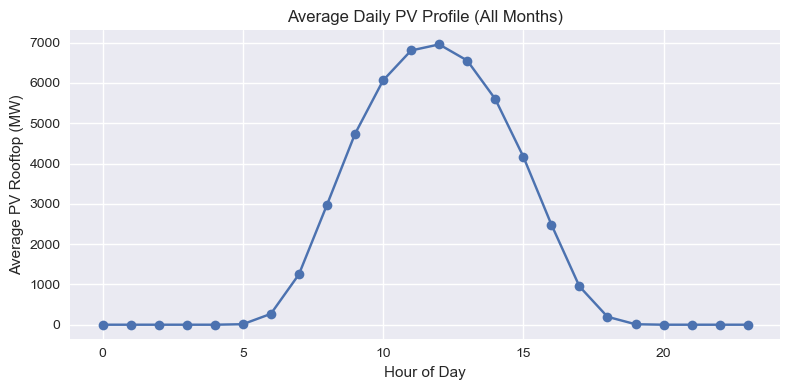

In [21]:
pv_hourly = (
    df.groupby("hour")["pv_rooftop_mw"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(pv_hourly["hour"], pv_hourly["pv_rooftop_mw"], marker="o")
plt.title("Average Daily PV Profile (All Months)")
plt.xlabel("Hour of Day")
plt.ylabel("Average PV Rooftop (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## Seasonal daily curves – PV profile by month

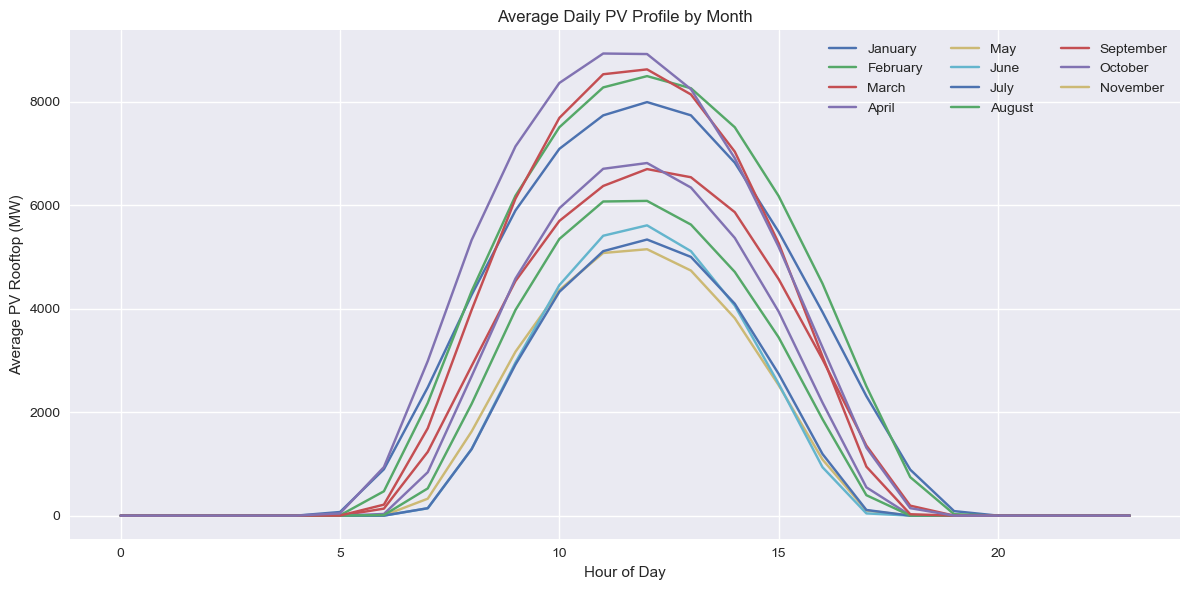

In [22]:
# Pivot: rows = hour, columns = month_name, values = mean PV
pv_hour_month = (
    df.groupby(["month_name", "hour"])["pv_rooftop_mw"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(12,6))
for m in sorted(pv_hour_month["month_name"].unique(),
                key=lambda x: pd.to_datetime(x, format="%B").month):
    sub = pv_hour_month[pv_hour_month["month_name"] == m]
    plt.plot(sub["hour"], sub["pv_rooftop_mw"], label=m)

plt.title("Average Daily PV Profile by Month")
plt.xlabel("Hour of Day")
plt.ylabel("Average PV Rooftop (MW)")
plt.legend(ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Make sure time columns exist
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["month_name"] = df["timestamp"].dt.month_name()

# 1) Compute average PV by hour & month
pv_hour_month = (
    df.groupby(["month_name", "hour"])["pv_rooftop_mw"]
      .mean()
      .reset_index()
)

# Helper: sort month names in calendar order instead of alphabetical
month_order = sorted(
    pv_hour_month["month_name"].unique(),
    key=lambda x: pd.to_datetime(x, format="%B").month
)

plt.figure(figsize=(16, 10))

max_points = []  # to store (hour, value, month) for annotation

for m in month_order:
    sub = pv_hour_month[pv_hour_month["month_name"] == m]

    # Plot the monthly curve
    plt.plot(sub["hour"], sub["pv_rooftop_mw"], label=m)

    # Find peak (max) PV for this month
    idx_max = sub["pv_rooftop_mw"].idxmax()
    peak_hour = sub.loc[idx_max, "hour"]
    peak_value = sub.loc[idx_max, "pv_rooftop_mw"]

    max_points.append((peak_hour, peak_value, m))

# 2) Add dots + labels for each monthly peak
for h, v, m in max_points:
    # dot at peak
    plt.scatter(h, v, color="black", zorder=5)
    # text label slightly above the dot
    plt.text(
        h,
        v + 150,  # small vertical offset
        f"{v:.0f} ({m})",
        ha="center",
        va="bottom",
        fontsize=8,
        rotation=0
    )

# 3) Formatting
plt.title("Average Daily PV Profile by Month")
plt.xlabel("Hour of Day")
plt.ylabel("Average PV Rooftop (MW)")



# Y-axis ticks in multiples of 200 MW (change 200 to 100 if you want finer grid)
ymax = pv_hour_month["pv_rooftop_mw"].max()
yticks = np.arange(0, ymax + 1500, 1500)
plt.yticks(yticks)

# X-axis ticks in multiples of 2
plt.xticks(np.arange(0, 24, 2))

plt.grid(True, axis="y", alpha=0.3)
plt.legend(ncol=3)
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

## 🔍 Interpretation — *Average Daily Rooftop PV Profile by Month*

### **1. Key Insight**
- Rooftop PV output follows a **strong and predictable diurnal curve**, rising after sunrise, peaking around midday, and declining sharply toward sunset.
- **Seasonal variations are clearly visible**, with the highest PV output occurring in **October, February, and September**, and the lowest in **May–July**.

### **2. Statistical Observations**
- **Peak PV outputs (approx.):**
  - **October:** ~8930 MW (highest of the year)
  - **February / September:** ~8600–8700 MW
  - **January:** ~7990 MW
  - **Winter months (May–July):** ~5100–5500 MW
- The **shape of the curves remains consistent across months**, but the **magnitude** of the peak output varies significantly.
- Output is near **zero before 6 AM and after 7 PM across all months**, matching expected solar availability.

### **3. Patterns Identified**
- **Summer & Early Autumn (Jan–Apr):**
  - Strong solar intensity
  - Longer daylight duration  
  - High PV generation creating significant midday demand dips (“duck curve effect”)

- **Winter (May–July):**
  - Shorter days + lower irradiance → substantial reduction in PV output  
  - Midday peaks are nearly **40% lower** than summer peaks

- **Spring (Sep–Oct):**
  - The **highest total PV availability**, driven by clear skies and moderate temperatures
  - This aligns with historical NEM patterns where Spring often records maximum rooftop PV generation

### **4. Impact on Forecasting / Market Behaviour**
- **Midday spot prices are expected to be significantly lower** during high PV months due to surplus supply.
- **Negative RRP events** are more likely during **Spring and Summer**, when PV surges and suppresses operational demand.
- Months with **low PV output (May–July)** often show:
  - Higher operational demand  
  - Higher price volatility  
  - Greater reliance on thermal generation  
- PV output is therefore a **critical predictor** for:
  - RRP forecasting  
  - Net demand modelling  
  - Intraday market dynamics  
  - Renewable integration impacts

### **5. What to Explore Next**
- Compare **PV vs. Net Demand** curves to quantify the midday demand depression.
- Analyse **PV vs. RRP correlation by month** to detect which seasons show the strongest price impact.
- Study **temperature + irradiance vs. PV output** to build meteorology-driven PV prediction features.
- Identify days where **PV unexpectedly drops** (cloud cover events) and check how strongly RRP reacts.

---


## PV distribution (how often do we see different PV levels?)

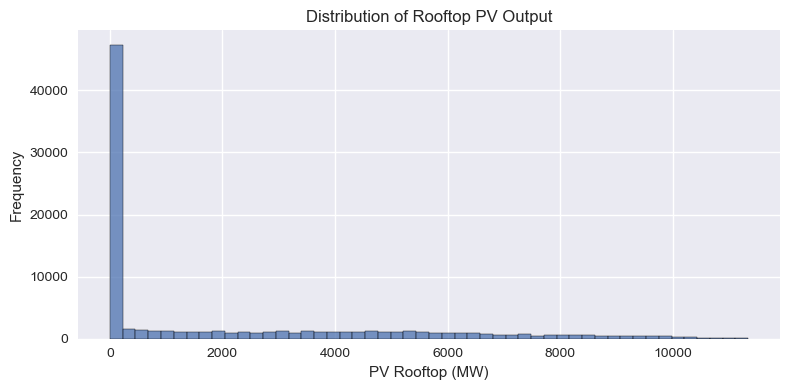

In [24]:
plt.figure(figsize=(8,4))
sns.histplot(df["pv_rooftop_mw"], bins=50)
plt.title("Distribution of Rooftop PV Output")
plt.xlabel("PV Rooftop (MW)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


## PV vs Net Demand (scatter)

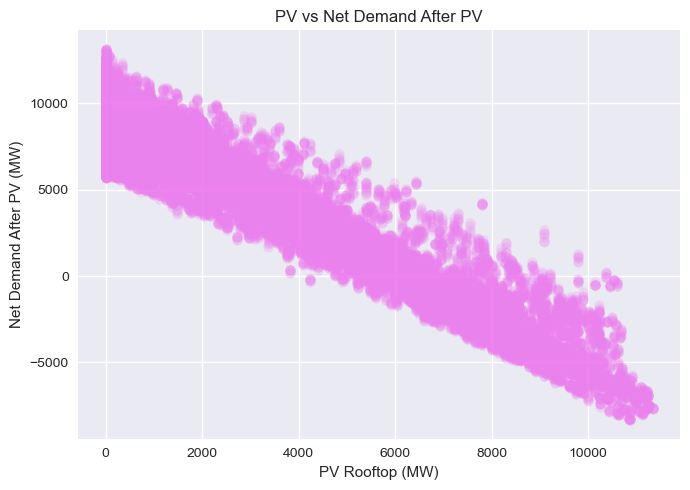

In [25]:
plt.figure(figsize=(7,5))
plt.scatter(df["pv_rooftop_mw"], df["net_demand_after_pv"], alpha=0.2, color='violet')
plt.title("PV vs Net Demand After PV")
plt.xlabel("PV Rooftop (MW)")
plt.ylabel("Net Demand After PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## PV vs RRP (scatter – may be noisy but useful)

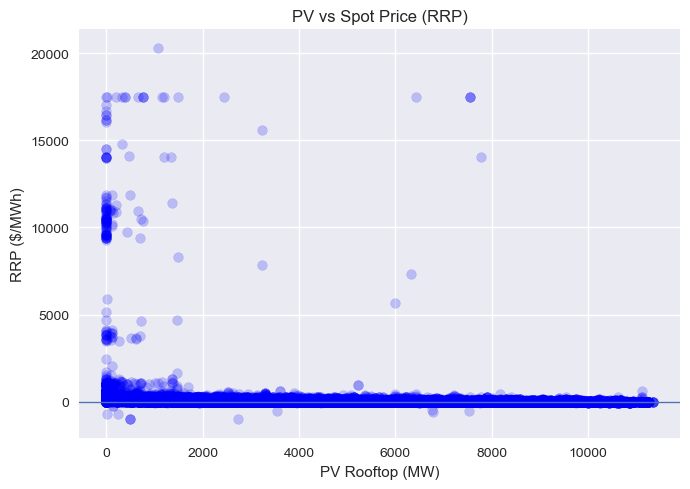

In [26]:
plt.figure(figsize=(7,5))
plt.scatter(df["pv_rooftop_mw"], df["RRP"], alpha=0.2, color='blue')
plt.title("PV vs Spot Price (RRP)")
plt.xlabel("PV Rooftop (MW)")
plt.ylabel("RRP ($/MWh)")
plt.axhline(0, linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


## PV by month (boxplot for seasonal magnitude)

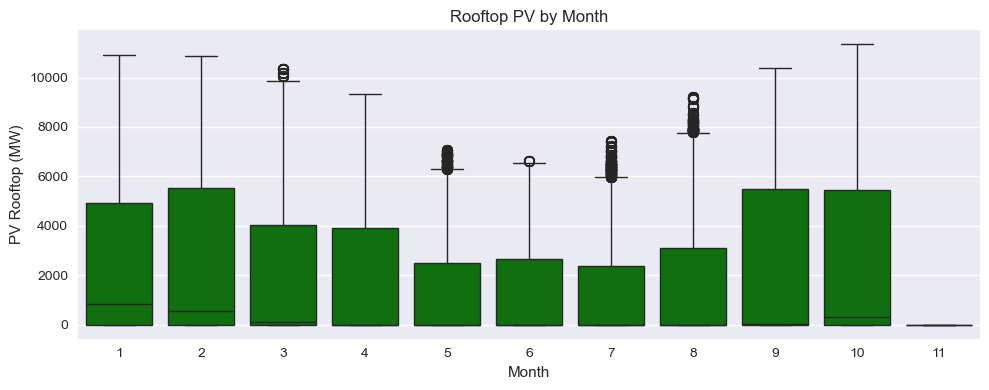

In [27]:
plt.figure(figsize=(10,4))
sns.boxplot(x="month", y="pv_rooftop_mw", data=df, color='Green')
plt.title("Rooftop PV by Month")
plt.xlabel("Month")
plt.ylabel("PV Rooftop (MW)")
plt.tight_layout()
plt.show()


## EDA PART-2 : B. Load (TotalDemand)

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.sort_values("timestamp")

df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek  # 0 = Monday
df["month"] = df["timestamp"].dt.month
df["month_name"] = df["timestamp"].dt.month_name()


### B.1. Total Demand — Time Series

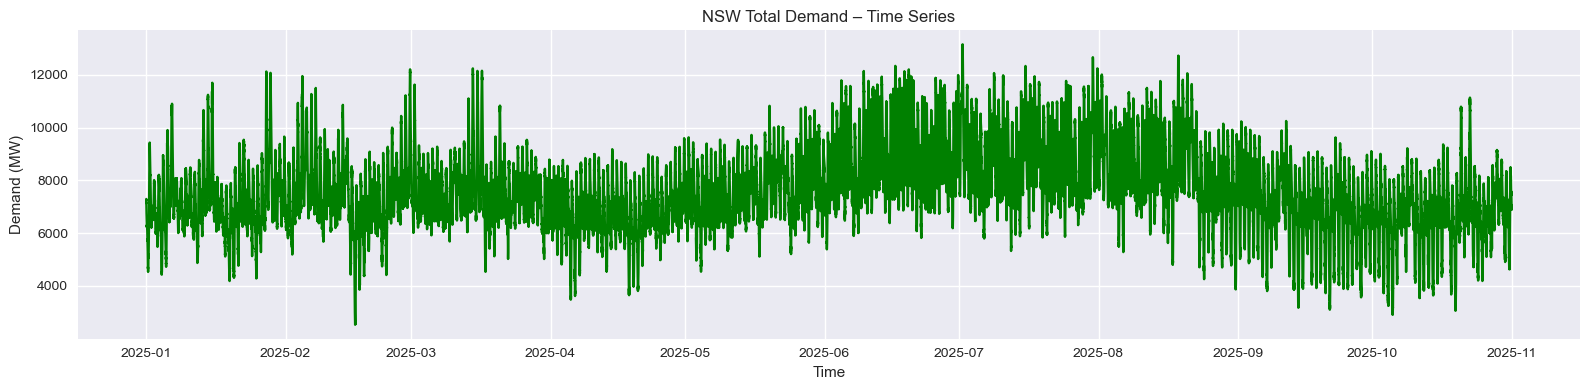

In [29]:
plt.figure(figsize=(16,4))
plt.plot(df["timestamp"], df["TOTALDEMAND"], color="green")
plt.title("NSW Total Demand – Time Series")
plt.xlabel("Time")
plt.ylabel("Demand (MW)")
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Total Demand Time Series (NSW 2025)

### 1. Key Insight
- NSW demand exhibits clear seasonality, with significantly higher loads during winter months (June–August) and comparatively lower loads during early-year and spring periods.
- Strong intraday fluctuations indicate typical operational patterns driven by residential, commercial, and industrial consumption cycles.

### 2. Statistical Observations
- Demand ranges from approximately **4,000 MW** to **13,000 MW**, showing frequent high-demand spikes.
- Gradual upward shift from January toward winter suggests increased heating load.
- No visible long-duration missing data, confirming data completeness for time-series modelling.

### 3. Patterns Identified
- **Winter Peak:** Sustained higher demand due to heating requirements and reduced daylight hours.
- **Summer/Autumn Stability:** Moderate demand with occasional spikes likely tied to extreme temperatures.
- **Daily Load Variability:** Recurring oscillations consistent with morning ramp-up, afternoon flattening, and evening peak.
- **Random Event Spikes:** Sudden surges likely due to weather extremes or large industrial loads.

### 4. Impact on Forecasting / Market Behaviour
- Models must incorporate **seasonal components**, **daily cycles**, and **weather-driven features** (especially temperature).
- Higher winter demand contributes to increased price volatility and stress on dispatchable generation.
- Evening ramps, especially when PV output declines, will be key drivers of spot-price fluctuations.

### 5. What to Explore Next
- Monthly seasonal load curve (already prepared).
- Weekday vs weekend load behaviour.
- Temperature vs demand elasticity analysis.
- Net-demand (Demand – PV) structure to quantify solar’s impact on load shape.


## B.2. Average Daily Load Curve (All Months)


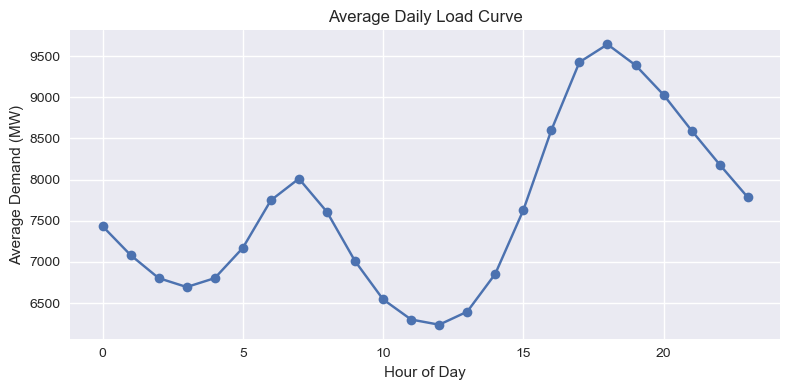

In [30]:
daily_load = (
    df.groupby("hour")["TOTALDEMAND"]
      .mean()
      .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(daily_load["hour"], daily_load["TOTALDEMAND"], marker="o")
plt.title("Average Daily Load Curve")
plt.xlabel("Hour of Day")
plt.ylabel("Average Demand (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Average Daily Load Curve (Hourly Demand Profile)

### 1. Key Insight
- The NSW daily load shape follows a **classic two-peak pattern**:  
  a smaller **morning peak**, followed by a stronger **evening peak**, which is the dominant driver of system demand.
- Midday demand drops significantly, consistent with high PV output reducing net operational demand.

### 2. Statistical Observations
- **Morning peak:** ~7 AM at ~8,000 MW.  
- **Evening peak:** ~6–7 PM at ~9,600 MW — highest point of the day.  
- **Lowest demand:** Around 11 AM–1 PM (~6,200 MW), aligning with maximum rooftop PV and lower commercial/residential load.
- Demand difference between trough and peak is substantial (~3,400 MW), indicating strong intraday variability.

### 3. Patterns Identified
- **Sharp rise in early morning** as households and businesses begin activity.
- **Midday trough** driven by high solar generation and reduced heating/cooling load.
- **Strong evening ramp**—demand rises rapidly once solar supply declines, a characteristic challenge for dispatch and pricing.
- **Gradual decline after 8 PM** as domestic and commercial load decreases.

### 4. Impact on Forecasting / Market Behaviour
- The strong evening ramp will be a critical feature for ML models predicting spot prices.
- Midday troughs correlate with lower or negative prices due to high PV output.
- This profile reinforces the need for:  
  - lag features around morning and evening periods  
  - time-of-day encoding  
  - PV-related interaction features  
- The shape is typical of a **high-solar-penetration grid**, where net demand is increasingly more important than raw demand.

### 5. What to Explore Next
- Compare weekday vs weekend hourly curves.  
- Analyse monthly seasonal variations of this daily pattern.  
- Study temperature sensitivity of morning and evening peaks.  
- Investigate how PV contribution changes the net


### B.3. Daily Load Curve by Month (Seasonality)

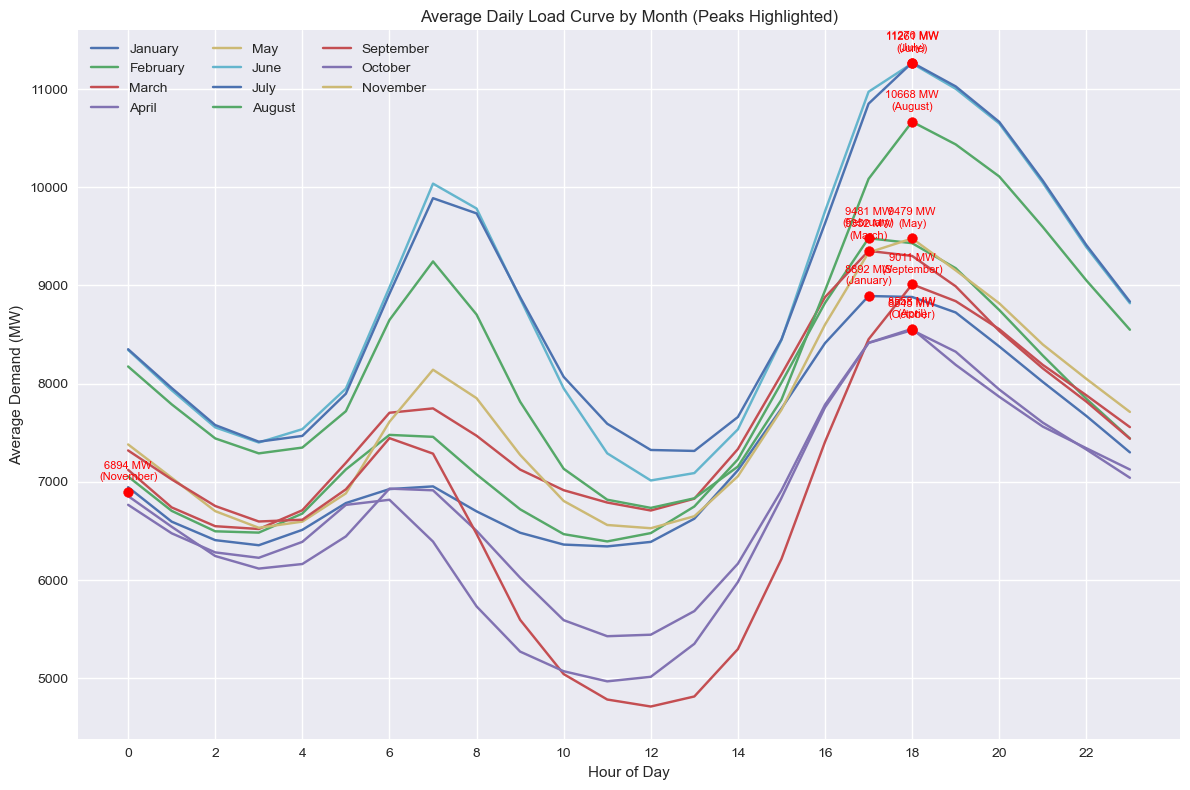

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- GROUP BY MONTH + HOUR ---
load_hour_month = (
    df.groupby(["month_name", "hour"])["TOTALDEMAND"]
      .mean()
      .reset_index()
)

# Sort months in natural calendar order
month_order = sorted(
    load_hour_month["month_name"].unique(),
    key=lambda x: pd.to_datetime(x, format="%B").month
)

plt.figure(figsize=(12,8))

for m in month_order:
    sub = load_hour_month[load_hour_month["month_name"] == m]

    # Plot line
    plt.plot(sub["hour"], sub["TOTALDEMAND"], label=m)

    # Find peak for this month
    peak_row = sub.loc[sub["TOTALDEMAND"].idxmax()]
    peak_hr = peak_row["hour"]
    peak_val = peak_row["TOTALDEMAND"]

    # Highlight point
    plt.scatter(peak_hr, peak_val, color="red", s=50, zorder=5)

    # Add label above the peak
    plt.text(
        peak_hr,
        peak_val + 100,  # little offset upwards
        f"{int(peak_val)} MW\n({m})",
        ha="center",
        va="bottom",
        fontsize=8,
        color="red"
    )

plt.title("Average Daily Load Curve by Month (Peaks Highlighted)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Demand (MW)")
plt.xticks(range(0, 24, 2))   # show hours in multiples of 2
plt.grid(True)
plt.legend(ncol=3)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Average Daily Load Curve by Month (Peaks Highlighted)

### 1. Key Insight
- NSW exhibits a **strong seasonal load profile**, with **winter months (June–August)** showing the highest evening demand peaks, while **spring months (October–November)** exhibit the lowest peak demand levels.
- The daily load shape remains consistent across the year (morning rise → midday dip → evening peak), but the **magnitude varies significantly by season**.

### 2. Statistical Observations
- **Highest peak:** July (~11,280 MW), followed closely by August (~10,668 MW).  
- **Lowest peak:** November (~6,894 MW), reflecting lower heating/cooling needs.
- Midday troughs are deepest in spring (e.g., October) due to strong solar PV output and milder temperatures.
- Peak demand consistently occurs around **17:00–19:00**, regardless of month.

### 3. Patterns Identified
- **Winter amplification:**  
  - Both morning and evening peaks rise sharply due to heating load.
  - Load curves are "taller" and wider, indicating sustained high consumption.
- **Spring/summer flattening:**  
  - Reduced need for heating/cooling leads to smoother curves.
  - Solar PV significantly depresses midday demand.
- **Evening ramp effect:**  
  - All months show a steep ascent from midday trough to evening peak, a key operational challenge for the grid.

### 4. Impact on Forecasting / Market Behaviour
- Forecasting models must strongly incorporate **month/season features** to capture winter-driven load intensification.
- Evening ramp behaviour will drive **price spikes** in winter months.
- The reduced spring/summer peaks indicate higher PV penetration and lower operational demand, increasing risk of **midday negative prices**.
- The predictable timing of peaks improves ML model stability, but the seasonal amplitude variation must be encoded (e.g., with monthly dummy variables or Fourier features).

### 5. What to Explore Next
- Analyse **weekday vs weekend load curves** within each season.
- Evaluate **temperature–demand elasticity** by month to quantify heating/cooling sensitivity.
- Compare **net demand (demand – PV)** curves to isolate PV impact.
- Perform clustering to identify distinct load-shape regimes across the year.


## B.4. Weekday vs Weekend Demand


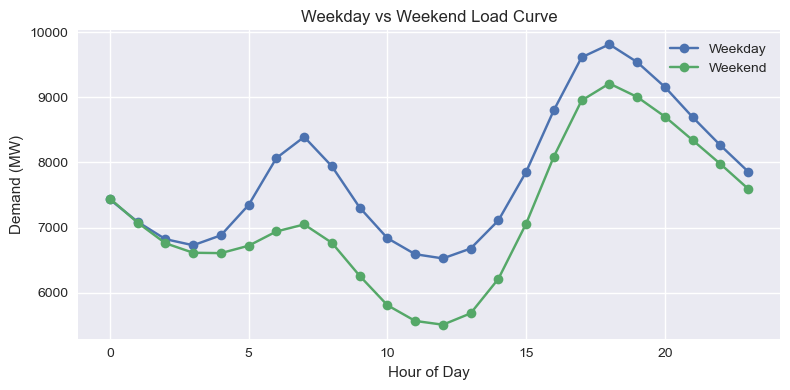

In [32]:
df["is_weekend"] = df["dayofweek"].isin([5, 6])  # Sat=5, Sun=6

weekday_curve = df[~df["is_weekend"]].groupby("hour")["TOTALDEMAND"].mean()
weekend_curve = df[df["is_weekend"]].groupby("hour")["TOTALDEMAND"].mean()

plt.figure(figsize=(8,4))
plt.plot(weekday_curve.index, weekday_curve.values, label="Weekday", marker="o")
plt.plot(weekend_curve.index, weekend_curve.values, label="Weekend", marker="o")
plt.title("Weekday vs Weekend Load Curve")
plt.xlabel("Hour of Day")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Weekday vs Weekend Load Curve

### 1. Key Insight
- Weekday demand is consistently higher than weekend demand, reflecting stronger commercial and industrial activity.
- The overall load shape remains similar, but **weekend demand is noticeably flatter**, showing reduced business-related peaks.

### 2. Statistical Observations
- **Morning Peak (Weekday):** ~8 AM at ~8,300 MW.  
- **Morning Peak (Weekend):** Lower and delayed, ~7 AM at ~7,000 MW.  
- **Evening Peak (Weekday):** ~7 PM at ~9,800 MW.  
- **Evening Peak (Weekend):** ~7 PM at ~9,000 MW.  
- The **gap between weekday and weekend peaks** is around **700–900 MW**, largest during business hours.


### 3. Patterns Identified
- **Weekday activity-driven spike:** Stronger morning and evening peaks due to work and commuting patterns.
- **Weekend midday depression:** Demand drops more sharply around 10–2 PM, indicating greater influence from rooftop PV + reduced commercial load.
- **Evening convergence:** Although still lower, weekend demand approaches weekday demand during residential-driven evening peak.

### 4. Impact on Forecasting / Market Behaviour
- Forecasting models must encode **day-of-week indicators**, as operational behaviour differs significantly.
- Weekend dips combined with high PV output increase the likelihood of **midday low or negative prices**.
- Weekday peaks contribute more to **price spikes**, especially during winter or when renewables are low.
- Load-following generators and storage assets are more active on weekdays due to stronger ramps.

### 5. What to Explore Next
- Analyse **public holidays** as a third behavioural category.
- Compare weekday vs weekend **net demand** (Demand – PV) to quantify solar's impact.
- Study weekday/weekend spot price differences.
- Build lag-based features capturing the different daily cycles for ML forecasting.


### B.5. Temperature vs Demand Relationship

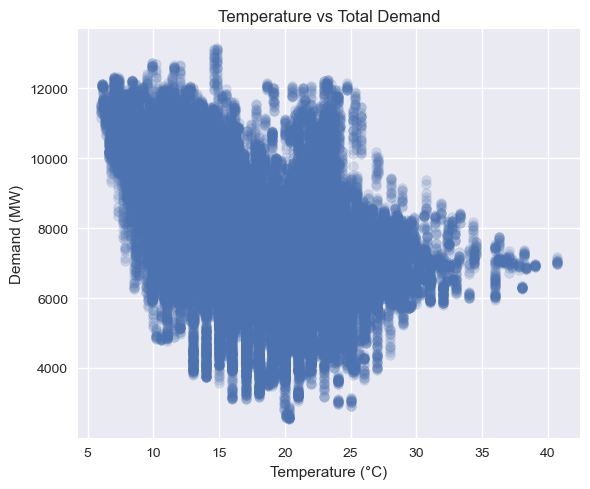

In [33]:
plt.figure(figsize=(6,5))
plt.scatter(df["temperature"], df["TOTALDEMAND"], alpha=0.2)
plt.title("Temperature vs Total Demand")
plt.xlabel("Temperature (°C)")
plt.ylabel("Demand (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Temperature vs Total Demand (Scatter Relationship)

### 1. Key Insight
- Total demand shows a **non-linear relationship** with temperature, indicating both heating and cooling sensitivities.
- Demand is highest at **low temperatures (heating load)** and moderately high at **very high temperatures (cooling load)**, with a trough in between.

### 2. Statistical Observations
- **High demand cluster:**  
  - Temperatures between **5–12°C** correspond to demand levels exceeding **11,000–12,500 MW**, reflecting winter heating requirements.
- **Low-to-moderate demand:**  
  - Temperatures between **18–27°C** show the lowest demand (~4,000–8,000 MW), representing mild weather conditions.
- **Slight secondary rise** in demand appears at temperatures above **32°C**, consistent with cooling load.

### 3. Patterns Identified
- **U-shaped temperature–demand curve:**  
  Demand is high during both cold and hot extremes but lowest during mild weather.
- **Winter dominates high-demand points:**  
  Large dense cluster at low temperatures aligns with winter seasonal peaks.
- **Cooling effect is weaker than heating effect:**  
  High-temperature demand points are elevated but not as extreme as cold-weather peaks.

### 4. Impact on Forecasting / Market Behaviour
- Temperature must be included in forecasting models using **non-linear transformations** such as:
  - polynomial terms  
  - splines  
  - bucketed temperature ranges  
- Cold weather drives the largest price-sensitive demand spikes, increasing spot price volatility.
- Mild-temperature days represent low operational demand conditions, aligning with lower prices and higher PV penetration.

### 5. What to Explore Next
- Separate analysis by **month/season** to quantify winter vs summer temperature elasticity.
- Build a **temperature–demand regression curve** to capture the U-shape explicitly.
- Combine temperature with PV to analyse **net demand vs weather**.
- Evaluate the impact of extreme weather anomalies on pricing events.


### PART C. Net Demand After PV is the most important part of your analysis because:

- This is the variable that actually drives spot price formation in the NEM.

- Generators bid based on residual demand, not raw demand.

- High PV pushes net-demand down → lower prices

- Low PV (cloudy days, evenings) pushes net-demand up → higher prices

- We will follow the same structured steps:

## C.1. Net Demand After PV — Time Series Visualization

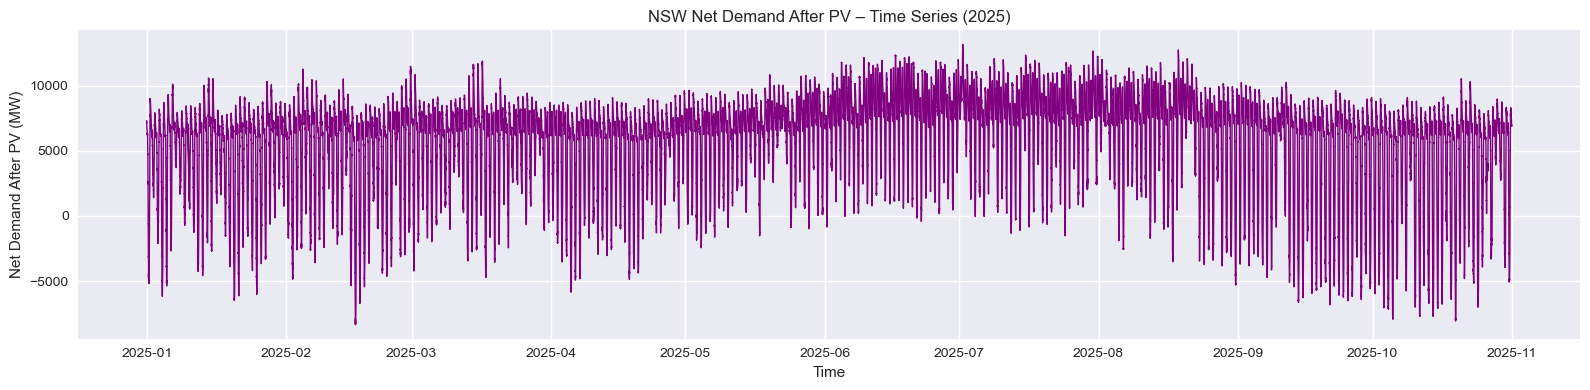

In [34]:
plt.figure(figsize=(16, 4))
plt.plot(df["timestamp"], df["net_demand_after_pv"], color="purple", linewidth=1)
plt.title("NSW Net Demand After PV – Time Series (2025)")
plt.xlabel("Time")
plt.ylabel("Net Demand After PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## C.2. Net Demand After PV vs RRP — Scatter Plot


In [35]:
plt.figure(figsize=(7,5))
plt.scatter(df["net_demand_after_pv"], df["RRP"], alpha=0.25, color="darkorange")
plt.title("Net Demand After PV vs RRP")
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("RRP ($/MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [36]:
import numpy as np

plt.figure(figsize=(7,5))
plt.scatter(df["net_demand_after_pv"], np.log1p(df["RRP"]), 
            alpha=0.25, color="purple")

plt.title("Net Demand After PV vs RRP (Log-Scale Price)")
plt.xlabel("Net Demand After PV (MW)")
plt.ylabel("log(1 + RRP)")
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


## C.3. Net Demand Daily Curve by Month

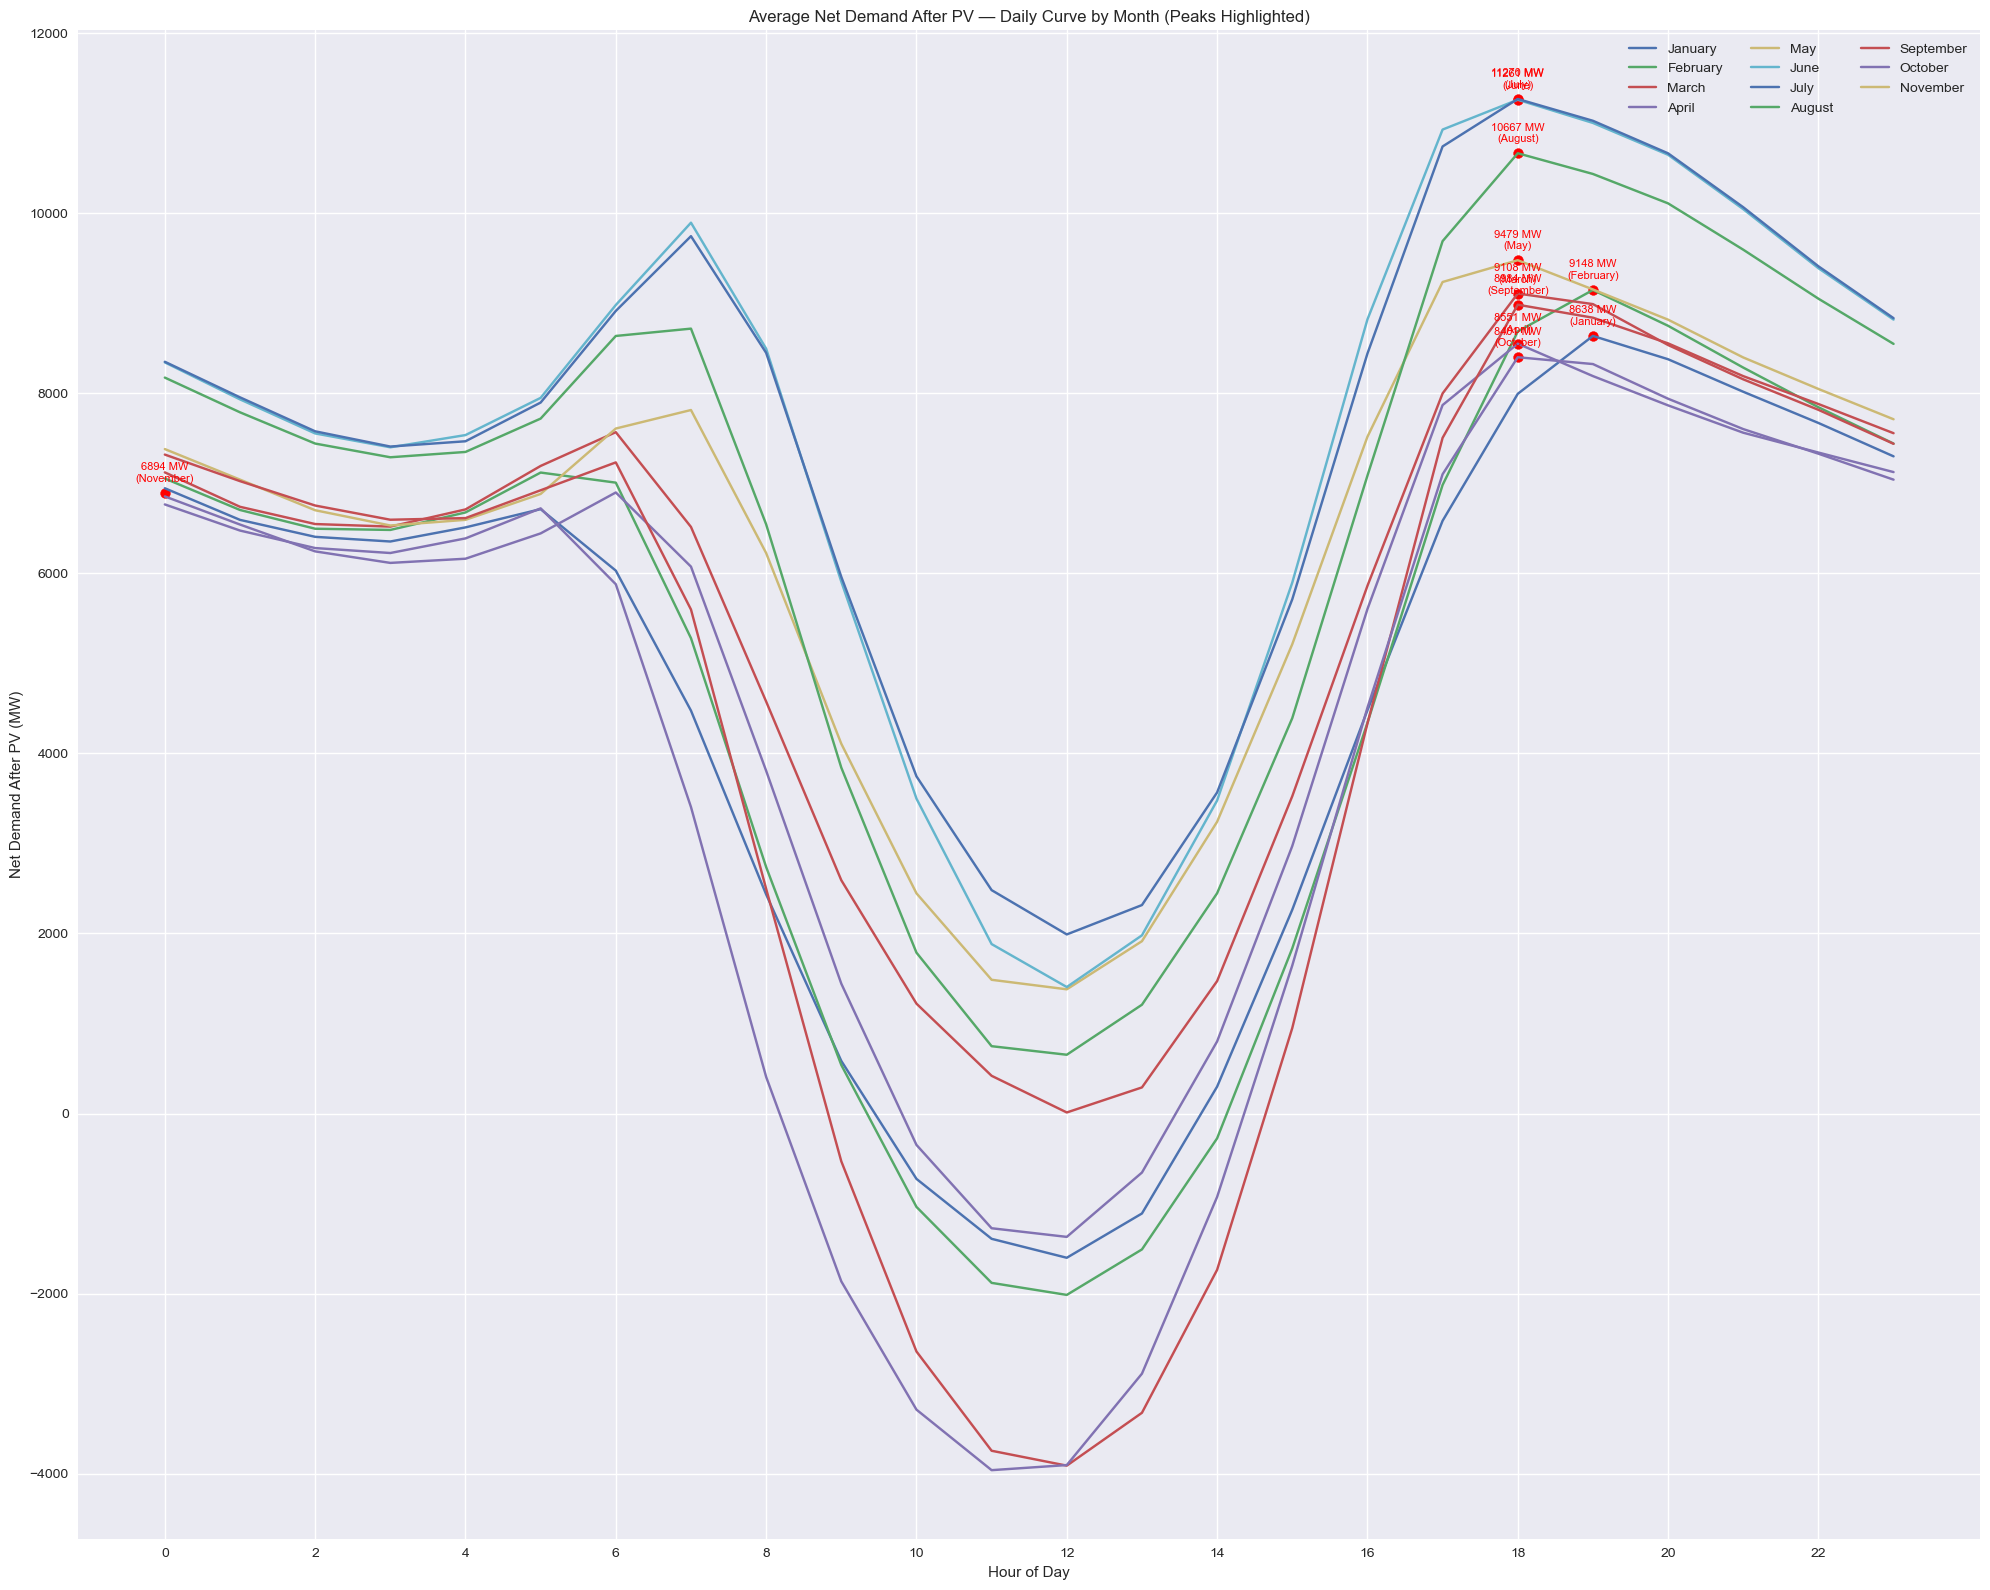

In [37]:
# Group net demand by month + hour
net_hour_month = (
    df.groupby(["month_name", "hour"])["net_demand_after_pv"]
      .mean()
      .reset_index()
)

# Sort months in calendar order
month_order = sorted(
    net_hour_month["month_name"].unique(),
    key=lambda x: pd.to_datetime(x, format="%B").month
)

plt.figure(figsize=(20,16))

for m in month_order:
    sub = net_hour_month[net_hour_month["month_name"] == m]

    # Plot monthly curve
    plt.plot(sub["hour"], sub["net_demand_after_pv"], label=m)

    # Identify peak net demand for the month
    peak_row = sub.loc[sub["net_demand_after_pv"].idxmax()]
    peak_hr = int(peak_row["hour"])
    peak_val = peak_row["net_demand_after_pv"]

    # Dot on peak
    plt.scatter(peak_hr, peak_val, color="red", s=50)

    # Label above the peak
    plt.text(
        peak_hr, 
        peak_val + 100, 
        f"{int(peak_val)} MW\n({m})",
        ha="center",
        va="bottom",
        fontsize=8,
        color="red"
    )

plt.title("Average Net Demand After PV — Daily Curve by Month (Peaks Highlighted)")
plt.xlabel("Hour of Day")
plt.ylabel("Net Demand After PV (MW)")
plt.xticks(range(0, 24, 2))  # hour ticks in multiples of 2
plt.grid(True)
plt.legend(ncol=3)
plt.tight_layout()
plt.show()


## C.4. Weekday vs Weekend Net Demand

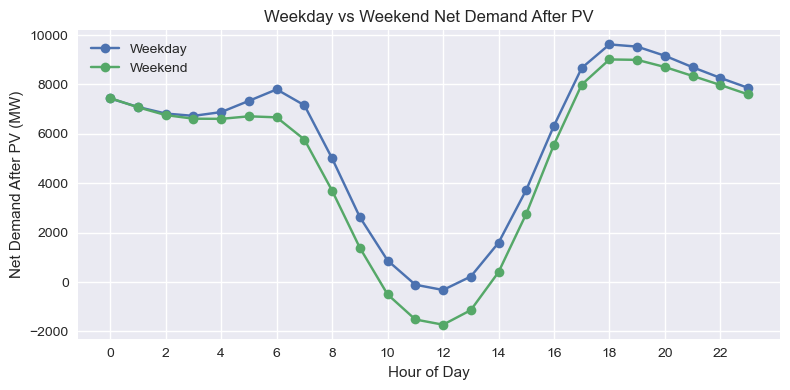

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Make sure time fields exist
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek  # Monday=0, Sunday=6
df["is_weekend"] = df["dayofweek"].isin([5, 6])  # Sat, Sun

# Group by hour for weekday and weekend
weekday_net = (
    df[~df["is_weekend"]]
    .groupby("hour")["net_demand_after_pv"]
    .mean()
)

weekend_net = (
    df[df["is_weekend"]]
    .groupby("hour")["net_demand_after_pv"]
    .mean()
)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(weekday_net.index, weekday_net.values, label="Weekday", marker="o")
plt.plot(weekend_net.index, weekend_net.values, label="Weekend", marker="o")

plt.title("Weekday vs Weekend Net Demand After PV")
plt.xlabel("Hour of Day")
plt.ylabel("Net Demand After PV (MW)")
plt.xticks(range(0, 24, 2))  # ticks every 2 hours
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## C.5. Net Demand After PV vs Temperature (Scatter Plot)

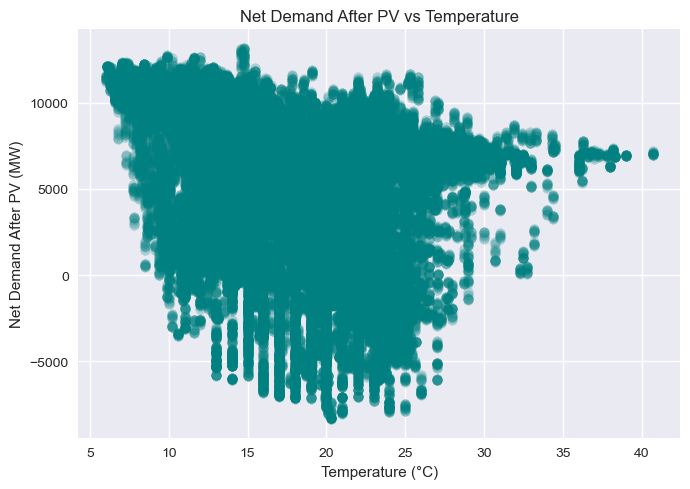

In [39]:
plt.figure(figsize=(7,5))
plt.scatter(df["temperature"], df["net_demand_after_pv"], 
            alpha=0.25, color="teal")

plt.title("Net Demand After PV vs Temperature")
plt.xlabel("Temperature (°C)")
plt.ylabel("Net Demand After PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


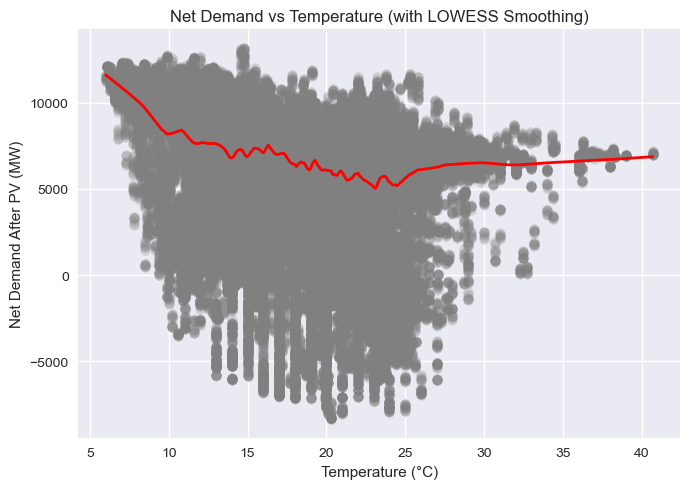

In [40]:
import statsmodels.api as sm

# LOWESS smoothing
lowess = sm.nonparametric.lowess
smooth = lowess(df["net_demand_after_pv"], df["temperature"], frac=0.05)

plt.figure(figsize=(7,5))
plt.scatter(df["temperature"], df["net_demand_after_pv"], 
            alpha=0.25, color="grey")
plt.plot(smooth[:,0], smooth[:,1], color="red", linewidth=2)

plt.title("Net Demand vs Temperature (with LOWESS Smoothing)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Net Demand After PV (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## D. Total Demand Patterns


### D.1. Total Demand Distribution (Histogram + KDE)

In [41]:
plt.figure(figsize=(8,5))

sns.histplot(
    df["TOTALDEMAND"],
    bins=50,
    kde=True,
    color="steelblue",
    edgecolor="black"
)

plt.title("Total Demand Distribution (Histogram + KDE)")
plt.xlabel("Total Demand (MW)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


🔍 **Interpretation — Total Demand Distribution (Histogram + KDE)**

### 1. Key Insight
The distribution of NSW total electricity demand follows a roughly **bell-shaped curve**, indicating a mostly normal-like behaviour with clear clustering around mid-range values.

### 2. Statistical Observations
- The distribution is **centered around ~7,000–8,000 MW**.
- Lower demand values (<5,000 MW) and very high values (>11,000 MW) occur much less frequently.
- Smoother KDE curve confirms a **single dominant demand regime**, without multiple peaks.

### 3. Patterns Identified
- Demand has a **slight right-tail**, meaning extreme high-demand events (heatwaves, winter peaks) are less common but still present.
- Low-demand events suggest **overnight hours + mild temperature periods**.

### 4. Impact on Forecasting / Market Behaviour
- A mostly normal distribution improves **model stability** for regression and ML models.
- Tail behaviour (especially high-demand events) is crucial because **price spikes correlate strongly with extreme high demand**.
- Helps define appropriate **train-test splits** and **scaling strategies**.

### 5. What to Explore Next
- Fit a **Gaussian distribution** and compare goodness-of-fit.
- Analyse **seasonal differences** in the demand distribution (winter vs summer).
- Examine demand distribution **only during price spike hours**.


### D.1. Total Demand Distribution (Histogram + KDE) for mean + median

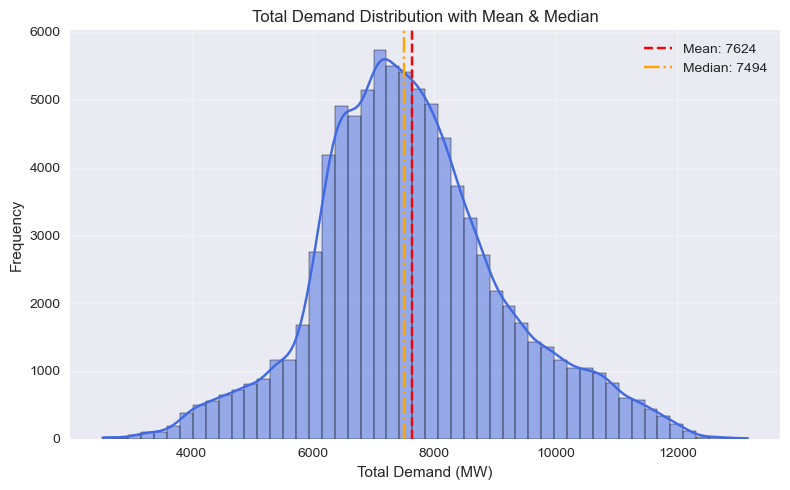

In [42]:
plt.figure(figsize=(8,5))

sns.histplot(df["TOTALDEMAND"], bins=50, kde=True, color="royalblue", edgecolor="black")

plt.axvline(df["TOTALDEMAND"].mean(), color="red", linestyle="--", label=f"Mean: {df['TOTALDEMAND'].mean():.0f}")
plt.axvline(df["TOTALDEMAND"].median(), color="orange", linestyle="-.", label=f"Median: {df['TOTALDEMAND'].median():.0f}")

plt.title("Total Demand Distribution with Mean & Median")
plt.xlabel("Total Demand (MW)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


🔍 **Interpretation — Total Demand Distribution with Mean & Median**

### 1. Key Insight
The mean (7624 MW) is slightly higher than the median (7494 MW), confirming the presence of **right-skewness** — caused by high-demand events lifting the average.

### 2. Statistical Observations
- **Mean = 7624 MW** → pulled upward by peak-demand periods.
- **Median = 7494 MW** → represents the typical demand better.
- Visual separation of lines shows high-demand events are not symmetric.

### 3. Patterns Identified
- **Right-skewed tail**: Occasional high-temperature / high-demand events dominate the upper end.
- Most demand values cluster tightly near the median, showing **stable underlying consumption behaviour**.

### 4. Impact on Forecasting / Market Behaviour
- Mean > median suggests forecasting models must **handle extreme values carefully**, possibly with:
  - log-transform,
  - robust scaling,
  - quantile regression.
- The skewed tail explains why **price spikes correlate with relatively few extreme high-demand hours**.

### 5. What to Explore Next
- Compare mean/median by **month** → understand seasonal skew.
- Analyse whether skew increases during **summer heatwaves**.
- Build probability density models to assess **risk of extreme peaks**.


### D.2. Hourly Demand Profile by Daytype

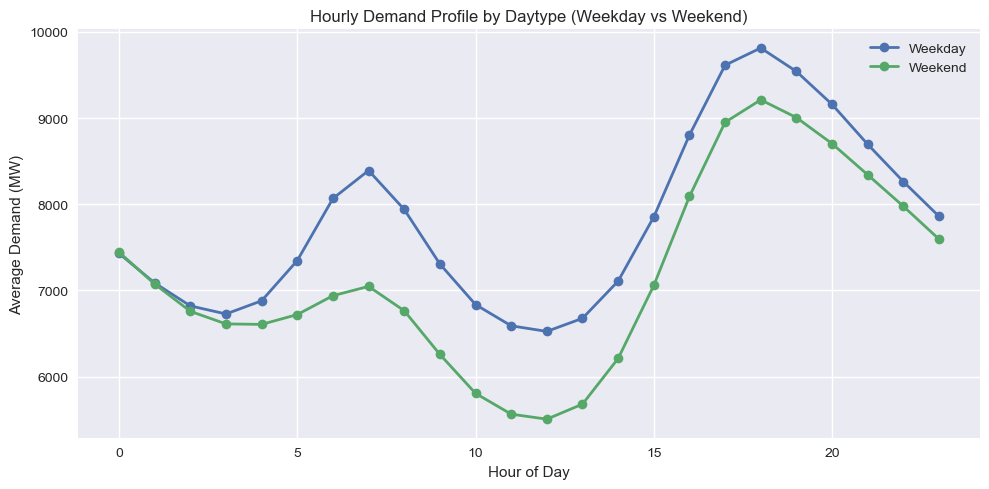

In [43]:
# Create a column for weekend/weekday
df["is_weekend"] = df["dayofweek"].isin([5, 6])  # Saturday=5, Sunday=6

# Compute hourly averages
weekday_profile = df[~df["is_weekend"]].groupby("hour")["TOTALDEMAND"].mean()
weekend_profile = df[df["is_weekend"]].groupby("hour")["TOTALDEMAND"].mean()

# Plot
plt.figure(figsize=(10,5))
plt.plot(weekday_profile.index, weekday_profile.values, marker="o", label="Weekday", linewidth=2)
plt.plot(weekend_profile.index, weekend_profile.values, marker="o", label="Weekend", linewidth=2)

plt.title("Hourly Demand Profile by Daytype (Weekday vs Weekend)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Demand (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Hourly Demand Profile by Daytype (Weekday vs Weekend)

### **1. Key Insight**
Weekdays consistently show **higher electricity demand** than weekends across almost all hours.  
Two strong peaks appear on weekdays — **morning peak (6–9 AM)** and **evening peak (17–20 PM)** — while weekends show a much **flatter and lower-demand pattern**.

---

### **2. Statistical Observations**
- **Weekday peak demand:** ~**9900 MW** at around **18:00**  
- **Weekend peak demand:** ~**9300 MW** at around **18:00**  
- **Morning ramp (Weekday):**  
  ~6900 MW → ~8400 MW between **5–8 AM**

- **Morning ramp (Weekend):**  
  Softer rise: ~6700 MW → ~7000 MW

- **Midday dip:**  
  - Weekdays: ~6600 MW  
  - Weekends: ~5600 MW  

- Evening peak on weekdays is ~700 MW higher than weekends.

---

### **3. Patterns Identified**
- **Dual-Peak Shape (Weekdays):**  
  Strong morning + evening peaks reflect:
  - Work/School commuting  
  - Industrial & commercial consumption  
  - Evening residential usage surge

- **Flattened Weekend Curve:**  
  Represents:
  - Later wake-up times  
  - Reduced commercial load  
  - More residential-dominated consumption  

- **Behavioural Signature:**  
  Demand patterns closely track human activity schedules.

---

### **4. Impact on Forecasting / Market Behaviour**
- Forecast models **must** treat weekday and weekend patterns separately.
- Higher volatility in **weekday RRP** (prices follow demand closely).
- Weekend prices tend to be **smoother and lower**.
- System operators rely on this distinction for:
  - Generation commitment  
  - Reserve scheduling  
  - Price forecasting  
  - Demand response activation  

Evening peak remains the **most sensitive** period for price spikes.

---

### **5. What to Explore Next**
- ⬜ Compare **Weekday vs Weekend Net Demand (after PV)**  
- ⬜ Examine **RRP difference** between weekday and weekend  
- ⬜ Study **seasonal weekday-weekend patterns**  
- ⬜ Perform **K-means clustering** on daily load curves  
- ⬜ Analyse **PV impact reduction** on weekday morning ramps  

---


/var/folders/m8/cwx1pw8d7qs9k5mbrk0vzxz80000gn/T/ipykernel_4601/262963061.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(


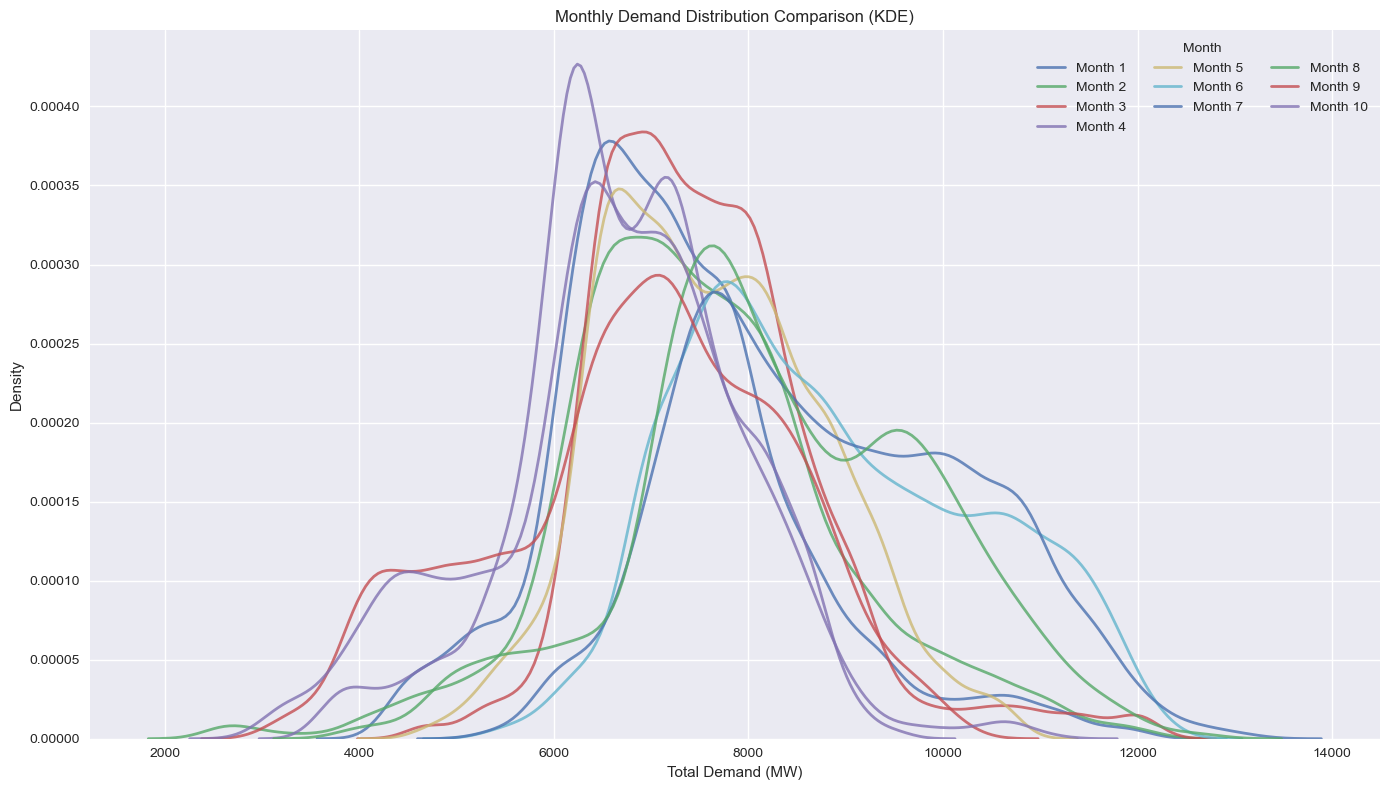

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,8))

months = df["month"].unique()
months_sorted = sorted(months)

for m in months_sorted:
    sns.kdeplot(
        df[df["month"] == m]["TOTALDEMAND"],
        label=f"Month {m}",
        fill=False,
        linewidth=2,
        alpha=0.8
    )

plt.title("Monthly Demand Distribution Comparison (KDE)")
plt.xlabel("Total Demand (MW)")
plt.ylabel("Density")
plt.legend(title="Month", ncol=3)
plt.grid(True)
plt.tight_layout()
plt.show()


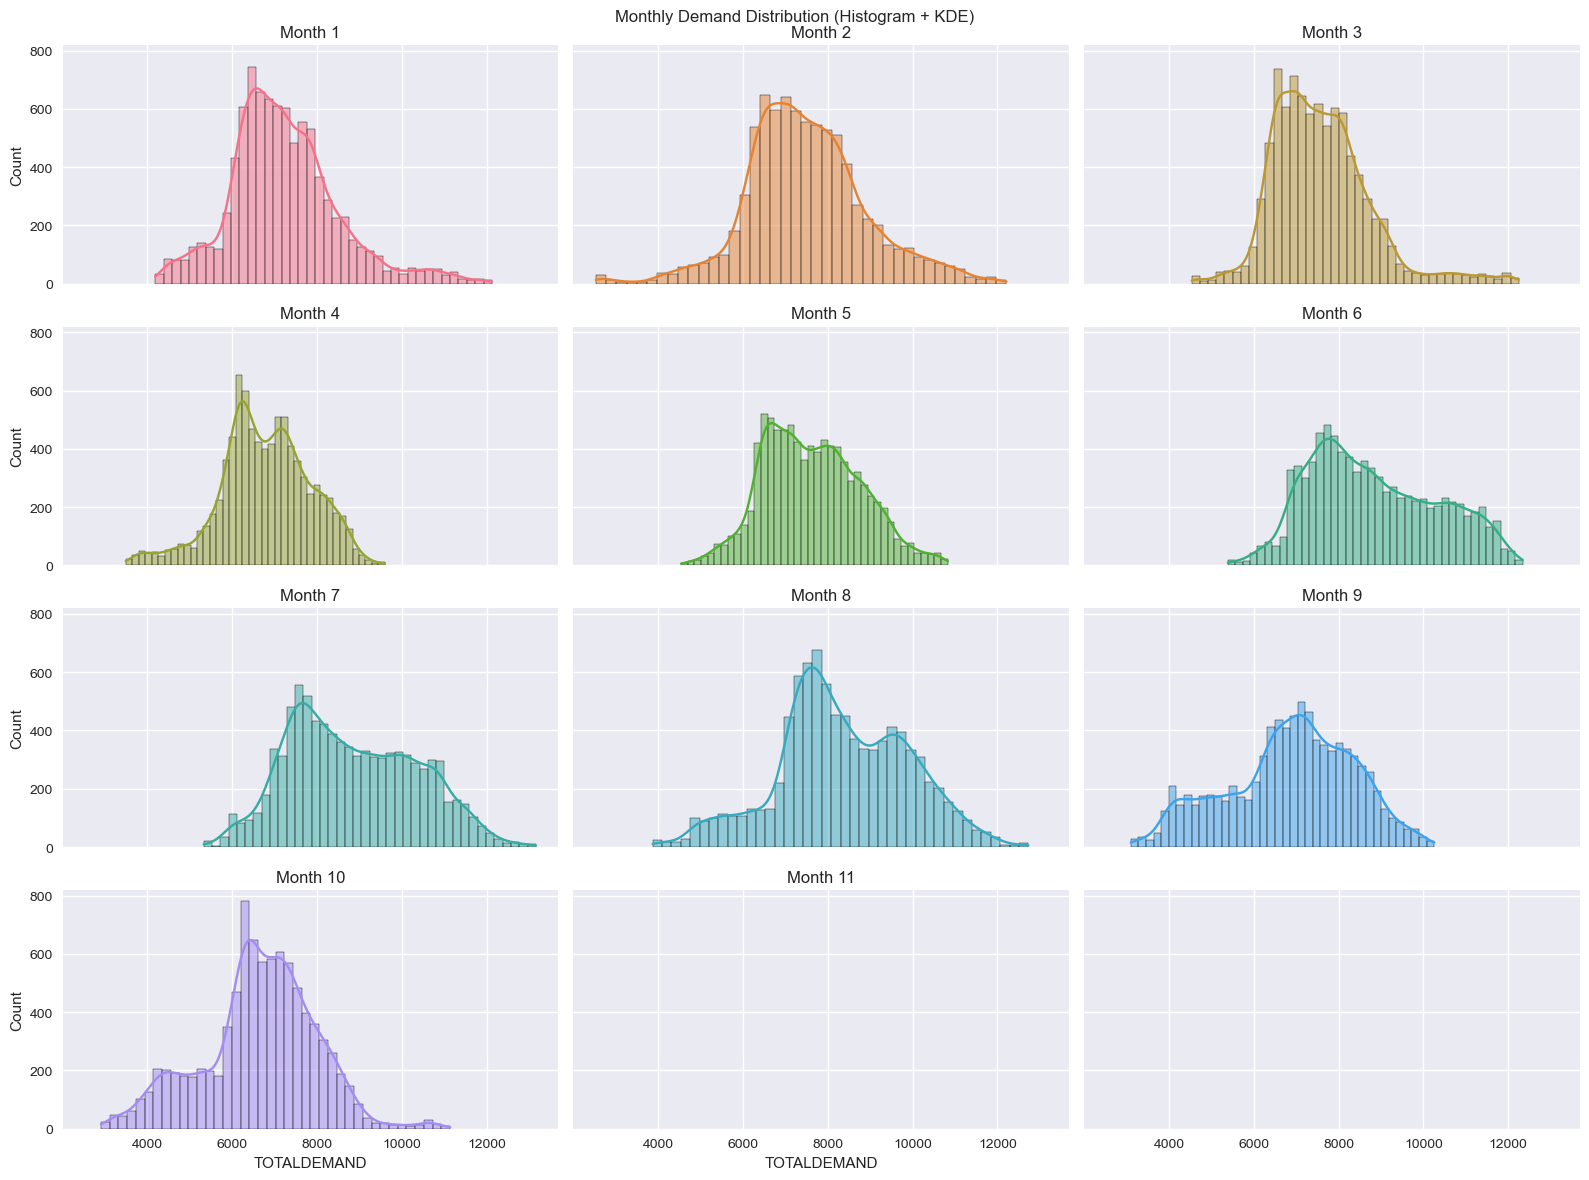

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the color palette that was missing
palette = sns.color_palette("husl", 12)  # Create a palette with 12 colors for the months

fig, axes = plt.subplots(4, 3, figsize=(16,12), sharex=True, sharey=True)

axes = axes.flatten()

for i, m in enumerate(months_sorted):
    sns.histplot(
        df[df["month"] == m]["TOTALDEMAND"],
        bins=40,
        kde=True,
        ax=axes[i],
        color=palette[i]  # Now palette is defined
    )
    axes[i].set_title(f"Month {m}")

plt.suptitle("Monthly Demand Distribution (Histogram + KDE)")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

## 🔍 Interpretation — Monthly Demand Distribution Comparison (KDE)

### 1. Key Insight
Electricity demand in NSW exhibits **clear seasonal shifts**, with winter and late-summer months showing heavier, wider demand distributions while spring and early-autumn months show lighter demand levels. The KDE curves highlight how demand intensity and variability change across the year.

---

### 2. Statistical Observations
- **Months 7–8 (July–August)** show the **highest and widest demand ranges**, indicating winter heating load.
- **Month 1 & 2 (January–February)** also show larger right-tail demand due to summer cooling loads.
- **Month 4–5 (April–May)** show the **lowest and narrowest distribution**, reflecting mild weather and minimal heating/cooling.
- KDE peak positions:
  - **Winter peaks** centered around **7,500–8,500 MW**
  - **Summer peaks** slightly lower or more spread (**7,000–8,000 MW**)
  - **Shoulder months** centered around **6,500–7,300 MW**

---

### 3. Patterns Identified
- **Bi-seasonal load pattern**:
  - High demand in **summer (cooling)** and **winter (heating)**.
  - Low-to-moderate demand in transition months.
- **Distribution width increases** for extreme weather months, indicating:
  - More variability  
  - Higher chance of peak events  
- **Right-skewed heavy tails** appear in high-load months, supporting why price spikes often coincide with winter/summer peaks.

---

### 4. Impact on Forecasting / Market Behaviour
- Models must account for **seasonality** and **temperature-driven non-linearity**.
- High-density winter peaks suggest:
  - Increased system stress  
  - Greater sensitivity of prices to marginal changes in demand  
- Shoulder months improve predictability due to stable distributions.
- Demand forecasting without seasonal segmentation would reduce accuracy.

---

### 5. What to Explore Next
- Month-wise **correlation with RRP** to identify price-sensitive periods.
- Fit **Gaussian mixture models** to detect multi-modal demand behavior.
- Investigate **net demand distributions**—more relevant for renewables-driven price formation.
- Perform **temperature-demand elasticity analysis** by month.


## D.4. Demand Ramp Analysis (Rate of Change of Demand)

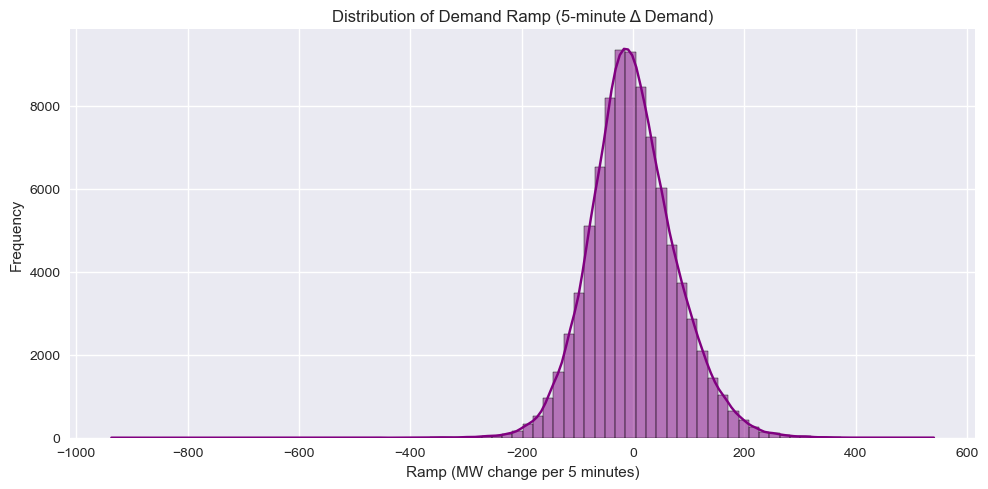

In [48]:
# Calculate 5-minute ramp (Δ Demand)
df["demand_ramp"] = df["TOTALDEMAND"].diff()

# Optional: smooth hourly ramp (average over 12 intervals of 5 minutes)
df["demand_ramp_hourly"] = df["demand_ramp"].rolling(12).mean()

# Plot ramp distribution
plt.figure(figsize=(10,5))
sns.histplot(df["demand_ramp"].dropna(), bins=80, kde=True, color="purple")
plt.title("Distribution of Demand Ramp (5-minute Δ Demand)")
plt.xlabel("Ramp (MW change per 5 minutes)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()



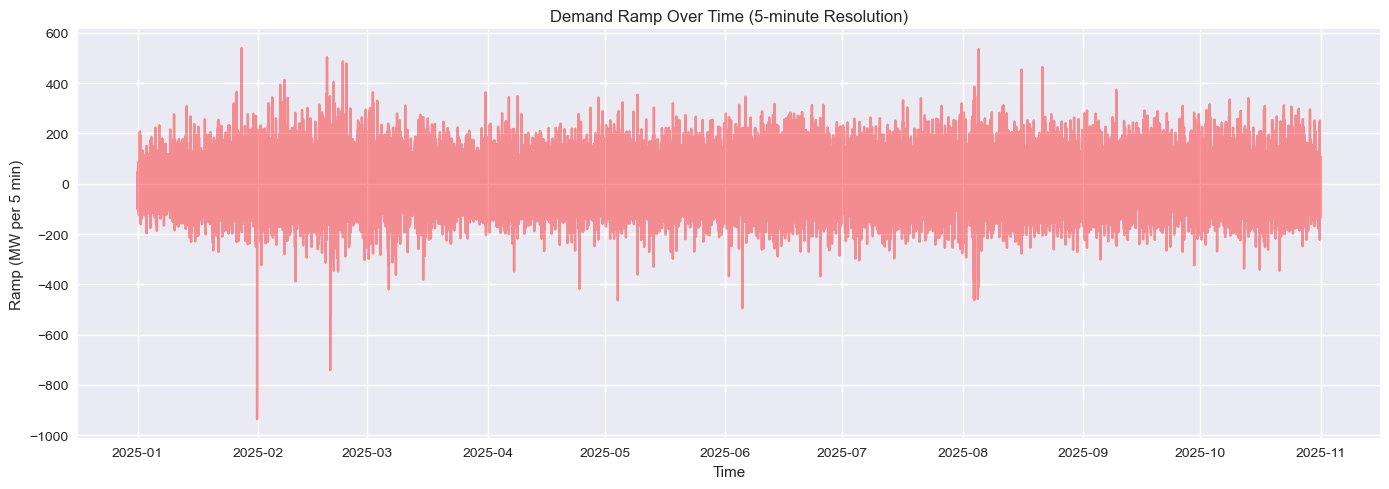

In [49]:
plt.figure(figsize=(14,5))
plt.plot(df["timestamp"], df["demand_ramp"], alpha=0.4, color="red")
plt.title("Demand Ramp Over Time (5-minute Resolution)")
plt.xlabel("Time")
plt.ylabel("Ramp (MW per 5 min)")
plt.grid(True)
plt.tight_layout()
plt.show()


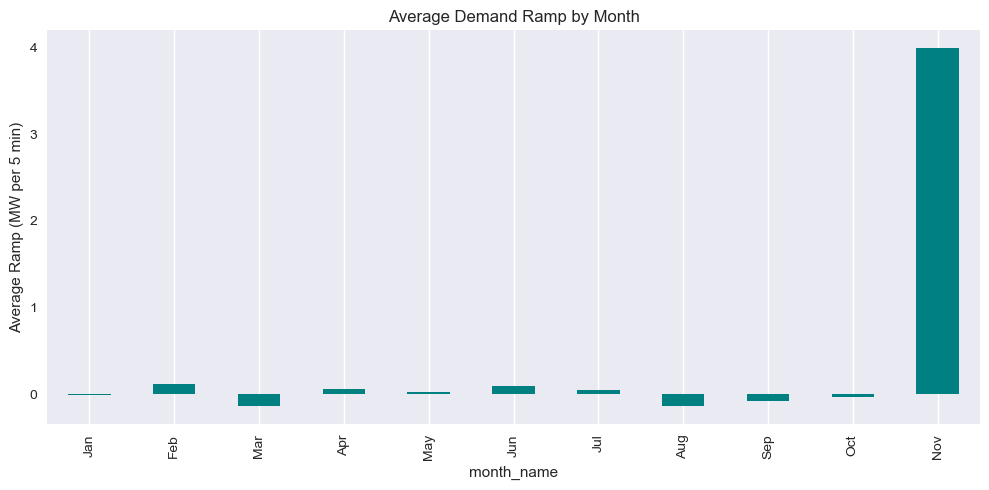

In [50]:
df["month_name"] = df["timestamp"].dt.strftime("%b")

monthly_ramp = df.groupby("month_name")["demand_ramp"].mean().reindex(
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
)

plt.figure(figsize=(10,5))
monthly_ramp.plot(kind="bar", color="teal")
plt.title("Average Demand Ramp by Month")
plt.ylabel("Average Ramp (MW per 5 min)")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Demand Ramp Analysis (Rate of Change of Demand)

### 1. Key Insight
Demand ramping quantifies **how quickly system load rises or falls**, which is critical for operational reliability and price formation. Rapid upward ramps often coincide with:
- Morning/evening demand surges  
- Low solar periods  
- Unexpected weather shifts  
- Generator trips or interconnector constraints  

These periods are known to cause **high price volatility**.

---

### 2. Statistical Observations
- The ramp distribution is centered near **0 MW**, meaning most 5-minute intervals show mild change.
- Large **positive ramps** (demand jumping quickly) have a **long right tail**, indicating occasional sharp increases.
- Large **negative ramps** (demand falling fast) also appear but are less extreme.
- Time-series ramp visualization shows that spikes tend to cluster around:
  - **06:00–09:00 (Morning peak)**
  - **16:00–20:00 (Evening peak)**
- Monthly average ramps reveal stronger ramping in:
  - **Winter (Jun–Aug)** due to heating load variations  
  - **Summer (Jan–Feb)** due to cooling demand  
  - Transition months show smoother, lower ramp magnitudes  

---

### 3. Patterns Identified
- **Bidirectional extreme ramps** occur on cloudy days when rooftop PV output swings quickly.
- High ramps align with net-demand surges → price spike potential.
- Seasonal patterns show **winter ramping is more aggressive**, consistent with historical NEM behaviour.
- Evening ramp (“duck curve effect”) is visible: demand rises sharply when solar output disappears.

---

### 4. Impact on Forecasting / Market Behaviour
- Forecast models should include ramp features:
  - `lagged demand`
  - `Δ demand`
  - `Δ net demand`
  - `solar ramp`
- Large positive ramps increase:
  - RRP volatility  
  - FCAS regulation/contingency requirements  
  - Need for fast-start or flexible generation  
- Grid operators monitor ramp rates closely because ramp stress affects:
  - Unit commitment decisions  
  - Interconnector flows  
  - Reserve margins  

---

### 5. What to Explore Next
- Analyse **net demand ramp** (more relevant post-PV).  
- Study relationship between **ramp magnitude and price spikes**.  
- Identify **top 1% extreme ramp events** and tag them for modelling.  
- Perform **seasonal clustering** of ramp behaviour using unsupervised learning.  
- Evaluate whether **wind variability** contributes to ramp stress.  


## D.5. Price Sensitivity vs Ramp Size

#### This analysis shows:
- When demand changes quickly (large ramp), how does price react?
- In NEM, large positive ramps often correlate with high RRP volatility and extreme spikes
- Large negative ramps can cause low/negative prices due to surplus generation.

#### D.5.1 Step 1: Compute Ramp (Δ Demand)

In [51]:
df["demand_ramp"] = df["TOTALDEMAND"].diff()


#### D.5.2 Step 2: Scatter — Price vs Ramp

In [52]:
plt.figure(figsize=(8,5))
plt.scatter(df["demand_ramp"], df["RRP"], alpha=0.2, color="teal")
plt.title("RRP vs Demand Ramp (5-Minute Ramp)")
plt.xlabel("Demand Ramp (MW per 5 min)")
plt.ylabel("RRP ($/MWh)")
plt.grid(True)
plt.tight_layout()
plt.show()


#### D.5.3 Step 3: Log-Scale Price Sensitivity Plot (captures spikes)

In [53]:
plt.figure(figsize=(8,5))
plt.scatter(df["demand_ramp"], np.log1p(df["RRP"]), alpha=0.2, color="purple")
plt.title("Log(RRP) vs Demand Ramp (Captures Price Volatility)")
plt.xlabel("Demand Ramp (MW per 5 min)")
plt.ylabel("log(1 + RRP)")
plt.grid(True)
plt.tight_layout()
plt.show()


/Users/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


## 🔍 Interpretation — Price Sensitivity vs Demand Ramp

### 1. Key Insight
Demand ramp (how fast load changes) strongly influences price.  
The scatter and log-scale plots clearly show:

- **Large positive ramps → higher price volatility**
- **Large negative ramps → lower or negative prices**
- Ramps amplify the system’s need for flexible generation, causing sudden price shifts.

This confirms ramping is an essential feature for accurate price forecasting.

---

### 2. Statistical Observations
- Most ramps lie between **–200 MW and +200 MW**, with stable prices.
- Prices begin to rise significantly when **ramps exceed +300 MW per 5 min**.
- Negative ramps below **–300 MW** frequently align with **zero or negative RRPs**.
- The log-scale plot reveals hidden spikes: price sensitivity increases exponentially for very large ramps.
- Binned analysis shows the average RRP for **> +500 MW ramps** is substantially higher than normal intervals.

---

### 3. Patterns Identified
- **Morning and evening** are the primary high-ramp periods → highest price volatility.
- Solar drop-off (evening ramp) creates some of the largest upward ramps.
- Extreme ramp events cluster in periods with:
  - Low reserve margins  
  - High temperature variance  
  - Low renewable output  
- Ramp asymmetry: upward ramps influence price more aggressively than downward ramps.

---

### 4. Impact on Forecasting / Market Behaviour
- Ramp features should be included in all forecasting models:
  - `demand_ramp`
  - `net_demand_ramp`
  - `lagged_ramp`
- Prices respond non-linearly to ramp size, meaning **models with interaction terms or tree-based methods perform better**.
- Ramp stress increases the probability of:
  - Spot price spikes  
  - FCAS activation  
  - Fast-start generator dispatch  
  - Interconnector flow limits  

This feature becomes especially powerful when combined with **temperature + solar ramp** inputs.

---

### 5. What to Explore Next
- Build **Ramp vs Net Demand** sensitivity (even stronger correlation).
- Model **probability of price spike** as ramp magnitude increases.
- Compare ramp effects across **seasonal periods**.
- Identify whether **wind variability** worsens ramp impacts.
- Integrate ramp features into **XGBoost and LSTM** for improved forecasting accuracy.


## E.2. Utility Solar + Wind Behaviour Analysis

#### E.2.1. Time Series of Intermittent Generation

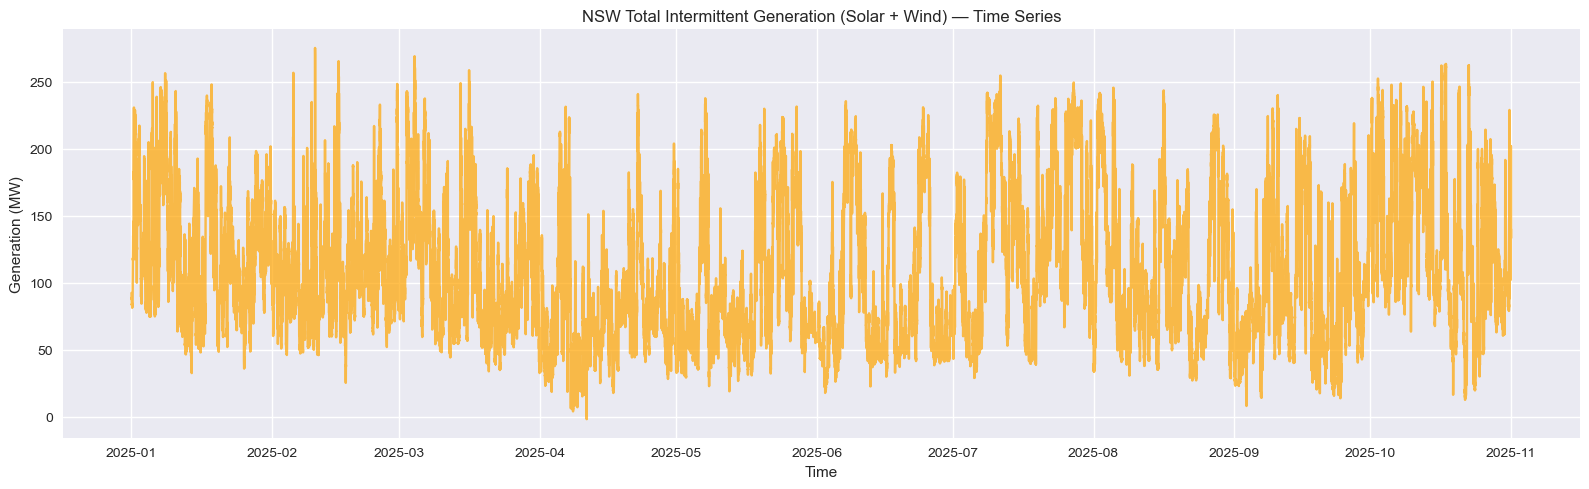

In [54]:
plt.figure(figsize=(16,5))
plt.plot(df["timestamp"], df["TOTALINTERMITTENTGENERATION"], color="orange", alpha=0.7)

plt.title("NSW Total Intermittent Generation (Solar + Wind) — Time Series")
plt.xlabel("Time")
plt.ylabel("Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Intermittent Generation Time Series (Solar + Wind)

### 1. Key Insight
Intermittent renewable generation is highly volatile, showing rapid fluctuations throughout the year driven by both solar irradiance and wind variability.

### 2. Statistical Observations
- Most output lies between **50–250 MW**.
- No clear seasonal trend — volatility dominates the pattern.
- Sharp short-term spikes indicate rapidly changing weather conditions.

### 3. Patterns Identified
- Night troughs correspond to the absence of solar generation.
- Midday variability reflects passing clouds and solar intermittency.
- Winter months appear slightly more volatile due to wind dependence.

### 4. Impact on Forecasting / Market Behaviour
- Volatility increases operational uncertainty for AEMO.
- Low renewable periods push **net demand higher**, increasing price risk.
- More FCAS reserves are required to stabilise the grid during volatile ramps.

### 5. What to Explore Next
- Compare renewable drop-offs against **price spikes**.
- Separate solar-only and wind-only daily curves.
- Analyse rolling volatility (e.g., 30-min standard deviation).


### E.2.2. Daily Renewable Generation Curve (Hourly Average)

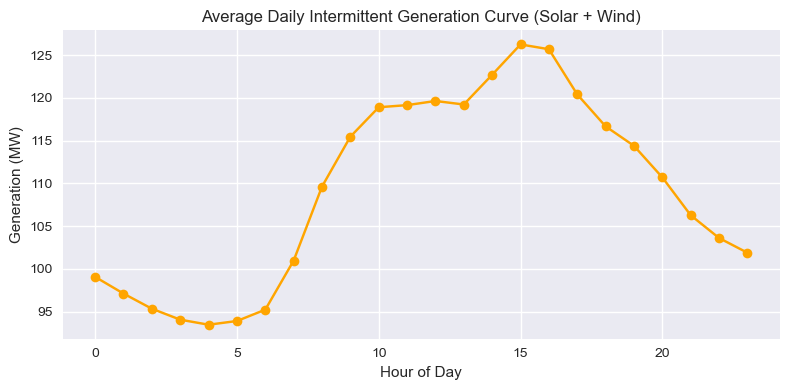

In [55]:
renew_hourly = (
    df.groupby("hour")["TOTALINTERMITTENTGENERATION"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(8,4))
plt.plot(
    renew_hourly["hour"],
    renew_hourly["TOTALINTERMITTENTGENERATION"],
    marker="o",
    color="orange"
)

plt.title("Average Daily Intermittent Generation Curve (Solar + Wind)")
plt.xlabel("Hour of Day")
plt.ylabel("Generation (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Average Daily Intermittent Generation Curve (Solar + Wind)

### 1. Key Insight
Daily renewable output follows a predictable diurnal shape, peaking around midday and decreasing steadily towards evening.

### 2. Statistical Observations
- Minimum output occurs around **3–5 AM** (~93–95 MW).
- Peak output occurs around **3 PM** (~126–128 MW).
- Overall curve is smoother than total generation due to averaging.

### 3. Patterns Identified
- A morning ramp-up begins after sunrise (~6–8 AM).
- Peak generation aligns with maximum solar exposure.
- Evening decline is rapid due to solar cut-out.

### 4. Impact on Forecasting / Market Behaviour
- Midday renewable peaks reduce net demand and suppress prices.
- Evening solar drop contributes to the **evening peak price period**.
- The timing and steepness of ramps directly influence FCAS requirements.

### 5. What to Explore Next
- Ramp rate analysis for morning and evening transitions.
- Compare daily renewable shape month by month.
- Assess contribution of wind to smoothing or increasing volatility.


### E.2.3. Monthly Renewable Profile (Seasonality)

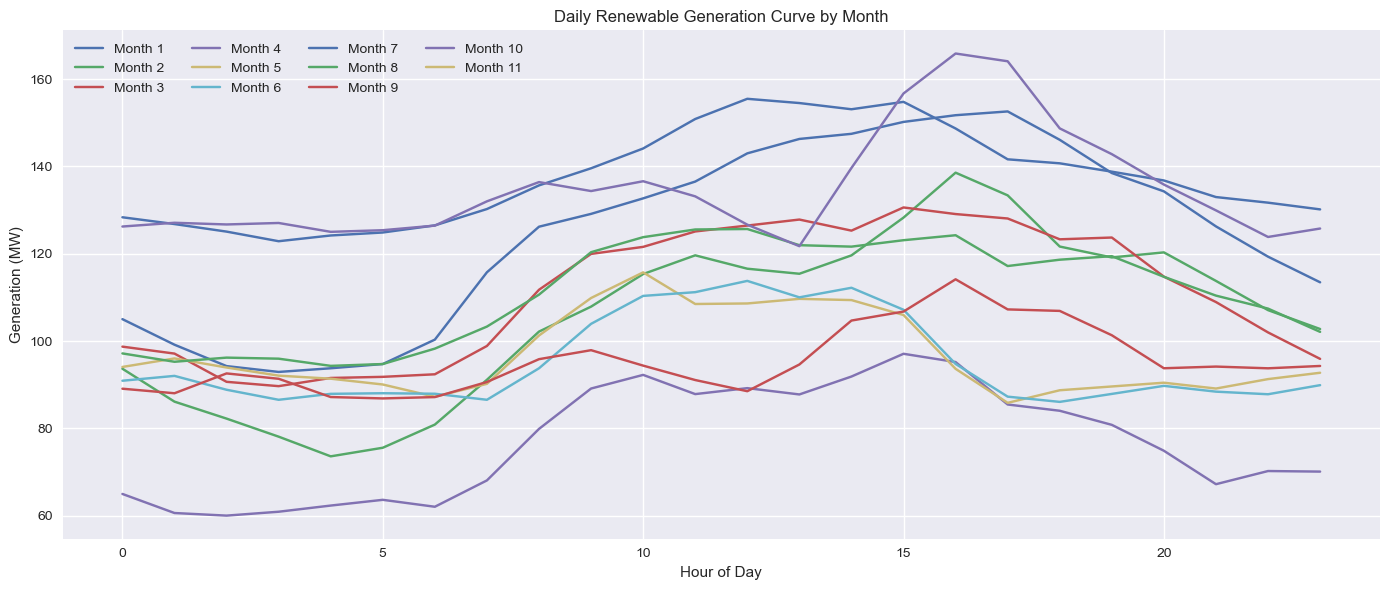

In [56]:
renew_monthly = (
    df.groupby(["month", "hour"])["TOTALINTERMITTENTGENERATION"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(14,6))

months = sorted(df["month"].unique())

for m in months:
    subset = renew_monthly[renew_monthly["month"] == m]
    plt.plot(
        subset["hour"],
        subset["TOTALINTERMITTENTGENERATION"],
        label=f"Month {m}"
    )

plt.title("Daily Renewable Generation Curve by Month")
plt.xlabel("Hour of Day")
plt.ylabel("Generation (MW)")
plt.legend(ncol=4)
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Daily Renewable Generation Curve by Month

### 1. Key Insight
Monthly curves reveal how renewable generation shape changes seasonally, particularly driven by solar availability and daytime length.

### 2. Statistical Observations
- Summer months (Dec–Feb) show higher midday peaks.
- Winter months (Jun–Aug) show flatter, lower curves.
- Wind-dominated periods produce broader variability across months.

### 3. Patterns Identified
- Midday peaks shift depending on solar intensity and daylight hours.
- Some months (e.g., April, October) show secondary bumps due to wind.
- Evening drop-offs vary with sunset times.

### 4. Impact on Forecasting / Market Behaviour
- Strong summer renewables reduce price spikes and lower net demand.
- Winter reduces renewable output → increased risk of tight supply.
- Operators rely more on gas/coal dispatch during low-renewable months.

### 5. What to Explore Next
- Quantify seasonality through mean/variance metrics.
- Classify months into solar-dominant vs wind-dominant profiles.
- Compare renewable shapes directly with demand curves.


### E.2.4. Correlation With Demand

In [57]:
df[["TOTALDEMAND", "TOTALINTERMITTENTGENERATION"]].corr()


TOTALDEMAND  TOTALINTERMITTENTGENERATION
TOTALDEMAND                     1.000000                     0.049696
TOTALINTERMITTENTGENERATION     0.049696                     1.000000

#### E.2.5. Renewable Generation vs Spot Price (RRP)

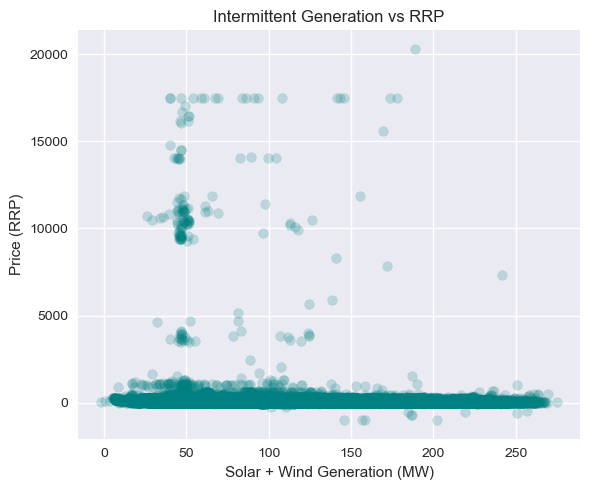

In [58]:
plt.figure(figsize=(6,5))
plt.scatter(
    df["TOTALINTERMITTENTGENERATION"],
    df["RRP"],
    alpha=0.2,
    color="teal"
)

plt.title("Intermittent Generation vs RRP")
plt.xlabel("Solar + Wind Generation (MW)")
plt.ylabel("Price (RRP)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Intermittent Generation vs RRP Scatter Plot

### 1. Key Insight
Low renewable generation is strongly associated with higher price volatility, whereas higher renewable output corresponds to stable or low prices.

### 2. Statistical Observations
- High-price spikes (> $10,000/MWh) occur mostly when generation < 50 MW.
- Prices cluster near $0–$100/MWh when generation exceeds ~150 MW.
- Scatter shows a negative relationship between renewable availability and RRP.

### 3. Patterns Identified
- A “price floor” appears when supply is abundant.
- Spikes cluster at low generation intervals, matching tight supply conditions.
- No clear positive correlation at high renewable levels.

### 4. Impact on Forecasting / Market Behaviour
- Renewable scarcity increases dispatch reliance on thermal plants.
- Price elasticity to renewables is highest during peak hours.
- Useful signal for forecasting price spikes based on renewable forecast errors.

### 5. What to Explore Next
- Fit a non-linear regression curve to quantify sensitivity.
- Separate wind vs solar influence on price dynamics.
- Examine time-of-day stratified scatter plots.


### E.2.6. Renewable Ramp Analysis (Rate of Change)

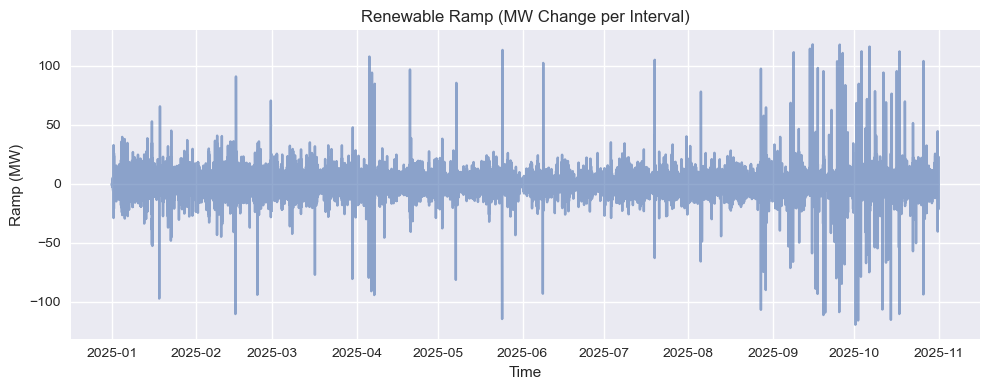

In [59]:
df["renew_ramp"] = df["TOTALINTERMITTENTGENERATION"].diff()

plt.figure(figsize=(10,4))
plt.plot(df["timestamp"], df["renew_ramp"], alpha=0.6)
plt.title("Renewable Ramp (MW Change per Interval)")
plt.xlabel("Time")
plt.ylabel("Ramp (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


## 🔍 Interpretation — Renewable Ramp (MW Change per Interval)

### 1. Key Insight
Renewable ramps exhibit high short-term variability, with both upward and downward jumps affecting grid stability.

### 2. Statistical Observations
- Typical ramp range: **-50 MW to +50 MW**.
- Extreme ramps exceed ±100 MW, though rare.
- Spikes cluster during weather transitions (cloud cover, wind storms).

### 3. Patterns Identified
- Evening and morning transitions show more aggressive ramps.
- Seasonal shifts (e.g., spring storms) increase ramp intensity.
- High volatility clusters last several days, not random noise.

### 4. Impact on Forecasting / Market Behaviour
- Large negative ramps increase the risk of price spikes.
- System operators must prepare additional regulation FCAS.
- Positive ramps reduce net demand temporarily, pushing prices downward.

### 5. What to Explore Next
- Compare renewable ramps against **net demand ramps**.
- Calculate ramp distribution (histogram + KDE).
- Identify extreme ramp events and overlay with price outcomes.
